In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


___

In [2]:
#@title Import Libraries
import pandas as pd
import numpy as np

from datetime import datetime 
import time

In [3]:
#Split Train/Test
from sklearn.model_selection import train_test_split

#Vectorizers
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

#Balancing Data
from imblearn.over_sampling import SMOTE

#ML Classification Libraries
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV  #https://stackoverflow.com/questions/55250963/how-to-get-probabilities-for-sgdclassifier-linearsvm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
!pip install scikit-multilearn
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset

#Pipeline
#from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline, make_pipeline
import joblib

#Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics

#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

#Visualizations
import matplotlib.pyplot as plt
!pip install scikit-plot
import scikitplot as skplt

#Save Model
import joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 KB 3.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import warnings
warnings.filterwarnings("ignore")

___

In [5]:
#@title Read Dataset
dfEng = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/DSPEnglishTweetsCleanedV2.pkl')
dfEng.head()

Tweets  flood_related  neutral  positive  \
0  continue read priv acc nga qrts ko              0        0         1   
1  thank opportunity lens option doge              0        0         1   
2                          tear laugh              0        0         1   
3      go coast coastal warn hope die              0        0         1   
4                  since see timeline              0        1         0   

   negative  anger  anticipation  disgust  fear  joy  sadness  surprise  \
0         0      0             1        0     1    0        0         0   
1         0      0             1        0     1    0        0         0   
2         0      0             1        0     0    1        0         0   
3         0      0             1        0     1    1        1         1   
4         0      0             0        0     0    0        0         0   

   trust sentiment  emotion_count  
0      1  positive              3  
1      0  positive              2  
2      0  positive              2  
3      1  positive              6  
4      0   neutral              0

___

In [6]:
#@title Split Dataset
X = dfEng['Tweets']

y_flood = dfEng['flood_related']
X_flood_train, X_flood_test, y_flood_train, y_flood_test = train_test_split(X, y_flood, stratify=y_flood, test_size=0.2, random_state=42)

y_sentiment = dfEng['sentiment']
X_sentiment_train, X_sentiment_test, y_sentiment_train, y_sentiment_test = train_test_split(X, y_sentiment, stratify=y_sentiment, test_size=0.2, random_state=42)

dfEng_subset = dfEng[dfEng['neutral'] != 1]
train, test = train_test_split(dfEng_subset, shuffle=True, test_size=0.2, random_state=42)

X_emotion_train = train['Tweets']
y_emotion_train = train[['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']]

X_emotion_test = test['Tweets']
y_emotion_test = test[['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']]

___


Machine Learning Algorithms
* Logistic Regression
* Decision Tree
* Random Forest
* Support Vector Machine (SVM)
* K-Nearest Neighbour (KNN)
* Multinomial Naive Bayes

___

# Flood Related or Not (Binary)

Execution time: 0:00:02.205758

========== Logistic Regression ==========
Logistic Regression Test Accuracy: 0.8883333333333333
Accuracy score: 0.8883333333333333
F1-score: 0.8878595398893658
Precision-score: 0.8877776414283961
Recall-score: 0.8879464285714286
ROC-AUC-score: 0.9442410714285714
[[286  34]
 [ 33 247]]


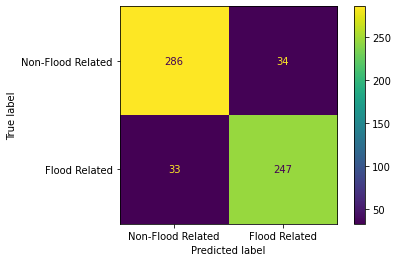

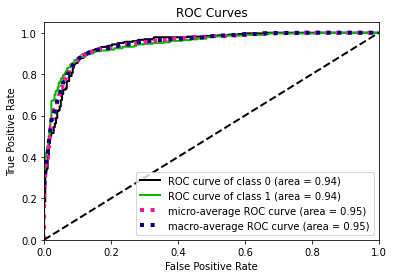


========== Decision Tree ==========
Decision Tree Test Accuracy: 0.78
Accuracy score: 0.78
F1-score: 0.7789166917897699
Precision-score: 0.79968893634802
Recall-score: 0.7881696428571429
ROC-AUC-score: 0.7881696428571429
[[213 107]
 [ 25 255]]


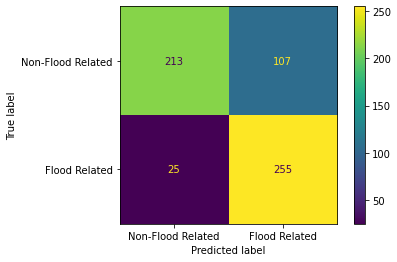

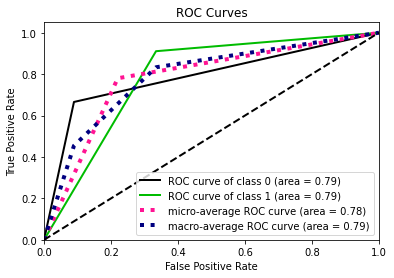


========== Random Forest ==========
Random Forest Test Accuracy: 0.8366666666666667
Accuracy score: 0.8366666666666667
F1-score: 0.8366376244665719
Precision-score: 0.8427636298421808
Recall-score: 0.8412946428571428
ROC-AUC-score: 0.9075446428571428
[[247  73]
 [ 25 255]]


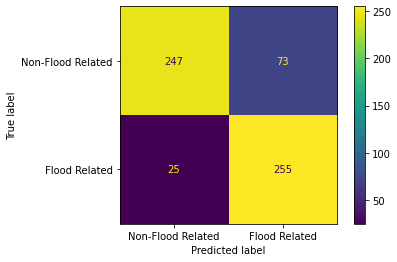

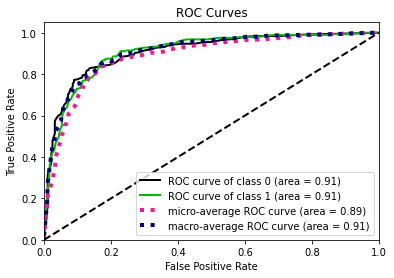


========== Support Vector Machine (SVM) ==========
Support Vector Machine (SVM) Test Accuracy: 0.8716666666666667
Accuracy score: 0.8716666666666667
F1-score: 0.8712772804399976
Precision-score: 0.8709187251616926
Recall-score: 0.871875
ROC-AUC-score: 0.945546875
[[278  42]
 [ 35 245]]


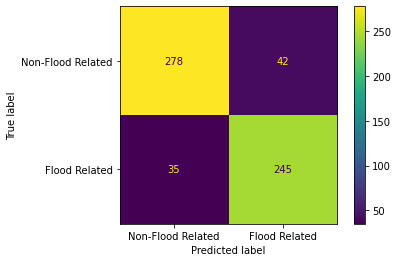

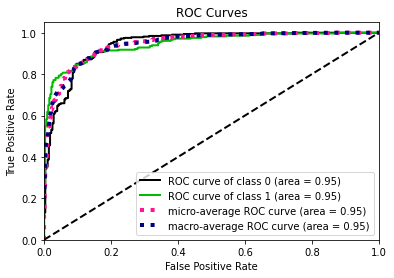


========== K-Nearest Neighbour (KNN) ==========
K-Nearest Neighbour (KNN) Test Accuracy: 0.49166666666666664
Accuracy score: 0.49166666666666664
F1-score: 0.368475541368303
Precision-score: 0.7393162393162394
Recall-score: 0.5234375
ROC-AUC-score: 0.6279129464285714
[[ 15 305]
 [  0 280]]


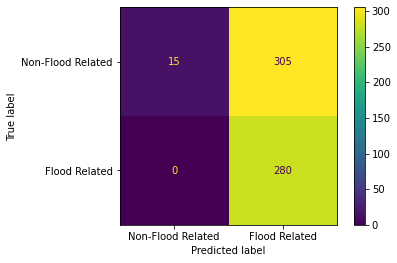

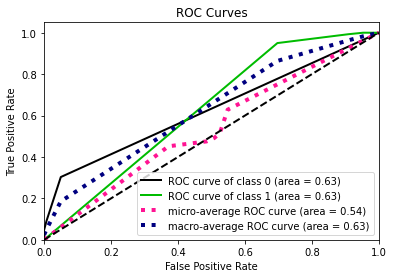


========== Multinomial Naive Bayes ==========
Multinomial Naive Bayes Test Accuracy: 0.91
Accuracy score: 0.91
F1-score: 0.9093706293706294
Precision-score: 0.9107744107744108
Recall-score: 0.9084821428571428
ROC-AUC-score: 0.9675837053571429
[[298  22]
 [ 32 248]]


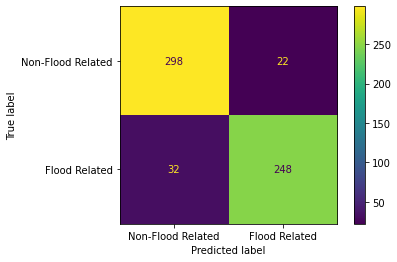

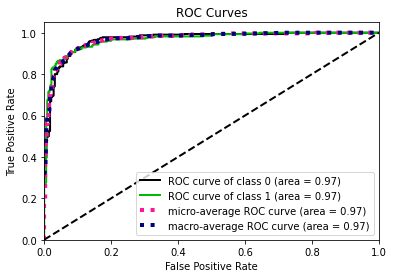

------------------------------------------
Best Accuracy Classifier: Multinomial Naive Bayes


In [7]:
#@title Bag of Words (Unigram)
#Vectorizing -> Balancing -> Training
flood_pipeline_lr = Pipeline([('cv', CountVectorizer(ngram_range=(1,1))),
                              ('smote', SMOTE(random_state=42)),
                              ('lr_model', LogisticRegression())])

flood_pipeline_dt = Pipeline([('cv', CountVectorizer(ngram_range=(1,1))),
                              ('smote', SMOTE(random_state=42)),
                              ('dt_model', DecisionTreeClassifier())])

flood_pipeline_rf = Pipeline([('cv', CountVectorizer(ngram_range=(1,1))),
                              ('smote', SMOTE(random_state=42)),
                              ('rf_model', RandomForestClassifier())])

flood_pipeline_svm = Pipeline([('cv', CountVectorizer(ngram_range=(1,1))),
                               ('smote', SMOTE(random_state=42)),
                               ('svm_model', CalibratedClassifierCV(SGDClassifier()))])

flood_pipeline_knn = Pipeline([('cv', CountVectorizer(ngram_range=(1,1))),
                               ('smote', SMOTE(random_state=42)),
                               ('knn_model', KNeighborsClassifier())])

flood_pipeline_mnb = Pipeline([('cv', CountVectorizer(ngram_range=(1,1))),
                               ('smote', SMOTE(random_state=42)),
                               ('mnb_model', MultinomialNB())])

#List of Pipelines
pipelines = [flood_pipeline_lr, flood_pipeline_dt, flood_pipeline_rf, flood_pipeline_svm, flood_pipeline_knn, flood_pipeline_mnb]

#Dictionary of Pipelines
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Random Forest', 3: 'Support Vector Machine (SVM)', 4: 'K-Nearest Neighbour (KNN)', 5: 'Multinomial Naive Bayes'}

start = datetime.now()

#Fit the Pipelines
for pipe in pipelines:
    pipe.fit(X_flood_train, y_flood_train)
    
stop = datetime.now()
execution_time = stop-start
print("Execution time:", execution_time)

class_names = ['Non-Flood Related', 'Flood Related']

for i, model in enumerate(pipelines):
    flood_y_predict_test = model.predict(X_flood_test)
    flood_y_predict_proba = model.predict_proba(X_flood_test)
    print("\n========== {} ==========".format(pipe_dict[i]))
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_flood_test,y_flood_test)))
    print('Accuracy score:',accuracy_score(y_flood_test, flood_y_predict_test))
    print('F1-score:',f1_score(y_flood_test, flood_y_predict_test, average='macro'))
    print('Precision-score:',precision_score(y_flood_test, flood_y_predict_test, average='macro'))
    print('Recall-score:',recall_score(y_flood_test, flood_y_predict_test, average='macro'))
    print('ROC-AUC-score:',roc_auc_score(y_flood_test, flood_y_predict_proba[:, 1], average='macro', multi_class='ovo'))
    print(confusion_matrix(y_flood_test, flood_y_predict_test)) 
    
    (ConfusionMatrixDisplay((metrics.confusion_matrix(y_flood_test, flood_y_predict_test)),display_labels=class_names)).plot()
    skplt.metrics.plot_roc(y_flood_test, flood_y_predict_proba)
    plt.show()

#Best Accuracy Model    
best_accuracy = 0.0
best_classifier = 0
best_pipeline = ""

print('------------------------------------------')
for i, model in enumerate(pipelines):
    if model.score(X_flood_test,y_flood_test)>best_accuracy:
        best_accuracy=model.score(X_flood_test,y_flood_test)
        best_pipeline=model
        best_classifier=i
print('Best Accuracy Classifier: {}'.format(pipe_dict[best_classifier]))

___

Execution time: 0:00:05.183935

========== Logistic Regression ==========
Logistic Regression Test Accuracy: 0.5916666666666667
Accuracy score: 0.5916666666666667
F1-score: 0.548768321694421
Precision-score: 0.714695153725899
Recall-score: 0.6149553571428572
ROC-AUC-score: 0.8280691964285715
[[ 85 235]
 [ 10 270]]


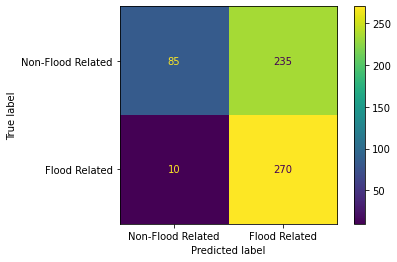

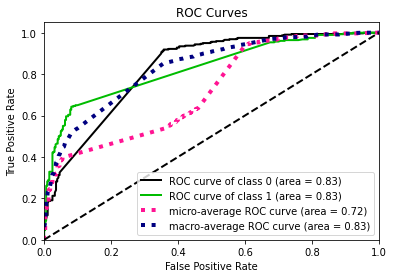


========== Decision Tree ==========
Decision Tree Test Accuracy: 0.545
Accuracy score: 0.545
F1-score: 0.47207441236854236
Precision-score: 0.7093631869729573
Recall-score: 0.5723214285714285
ROC-AUC-score: 0.7182979910714286
[[ 52 268]
 [  5 275]]


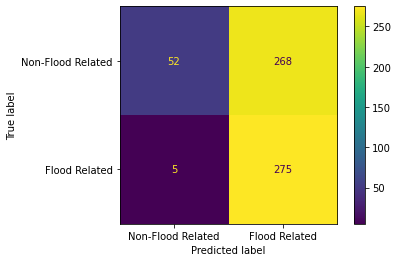

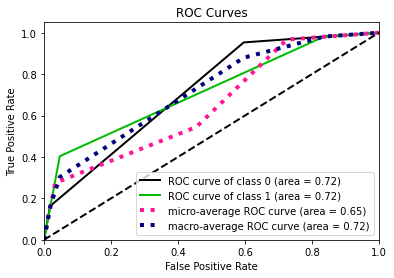


========== Random Forest ==========
Random Forest Test Accuracy: 0.5166666666666667
Accuracy score: 0.5166666666666667
F1-score: 0.4190006811716152
Precision-score: 0.7161712741633756
Recall-score: 0.5464285714285715
ROC-AUC-score: 0.7938895089285716
[[ 32 288]
 [  2 278]]


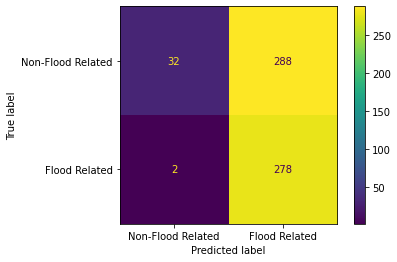

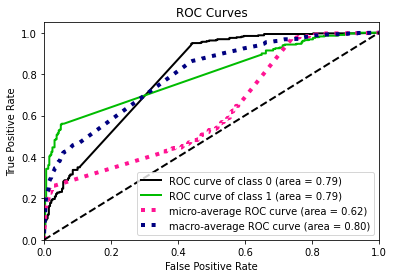


========== Support Vector Machine (SVM) ==========
Support Vector Machine (SVM) Test Accuracy: 0.78
Accuracy score: 0.78
F1-score: 0.769510150866083
Precision-score: 0.8079044117647058
Recall-score: 0.7691964285714286
ROC-AUC-score: 0.8229185267857141
[[298  22]
 [110 170]]


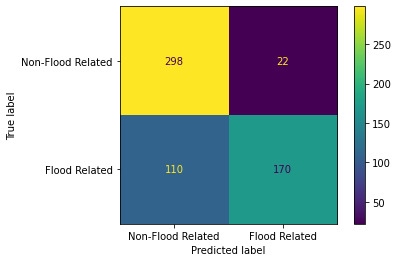

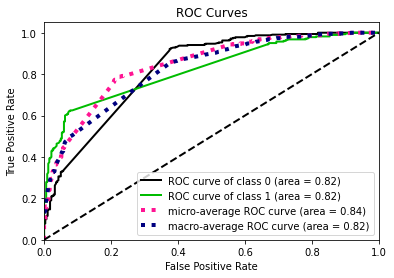


========== K-Nearest Neighbour (KNN) ==========
K-Nearest Neighbour (KNN) Test Accuracy: 0.4666666666666667
Accuracy score: 0.4666666666666667
F1-score: 0.3181818181818182
Precision-score: 0.23333333333333334
Recall-score: 0.5
ROC-AUC-score: 0.5185267857142858
[[  0 320]
 [  0 280]]


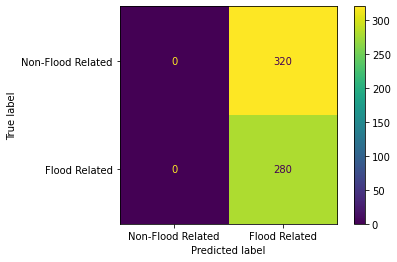

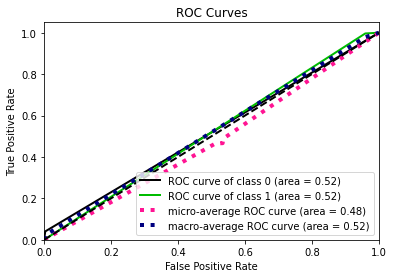


========== Multinomial Naive Bayes ==========
Multinomial Naive Bayes Test Accuracy: 0.7783333333333333
Accuracy score: 0.7783333333333333
F1-score: 0.7718689876186038
Precision-score: 0.790511631251573
Recall-score: 0.7705357142857143
ROC-AUC-score: 0.8306473214285713
[[284  36]
 [ 97 183]]


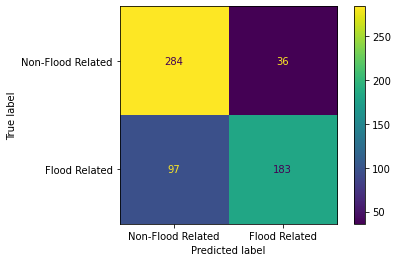

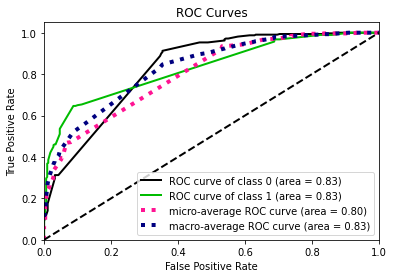

------------------------------------------
Best Accuracy Classifier: Support Vector Machine (SVM)


In [8]:
#@title Bag of Words (Bigram)
#Vectorizing -> Balancing -> Training
flood_pipeline_lr = Pipeline([('cv', CountVectorizer(ngram_range=(2,2))),
                              ('smote', SMOTE(random_state=42)),
                              ('lr_model', LogisticRegression())])

flood_pipeline_dt = Pipeline([('cv', CountVectorizer(ngram_range=(2,2))),
                              ('smote', SMOTE(random_state=42)),
                              ('dt_model', DecisionTreeClassifier())])

flood_pipeline_rf = Pipeline([('cv', CountVectorizer(ngram_range=(2,2))),
                              ('smote', SMOTE(random_state=42)),
                              ('rf_model', RandomForestClassifier())])

flood_pipeline_svm = Pipeline([('cv', CountVectorizer(ngram_range=(2,2))),
                               ('smote', SMOTE(random_state=42)),
                               ('svm_model', CalibratedClassifierCV(SGDClassifier()))])

flood_pipeline_knn = Pipeline([('cv', CountVectorizer(ngram_range=(2,2))),
                               ('smote', SMOTE(random_state=42)),
                               ('knn_model', KNeighborsClassifier())])

flood_pipeline_mnb = Pipeline([('cv', CountVectorizer(ngram_range=(2,2))),
                               ('smote', SMOTE(random_state=42)),
                               ('mnb_model', MultinomialNB())])

#List of Pipelines
pipelines = [flood_pipeline_lr, flood_pipeline_dt, flood_pipeline_rf, flood_pipeline_svm, flood_pipeline_knn, flood_pipeline_mnb]

#Dictionary of Pipelines
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Random Forest', 3: 'Support Vector Machine (SVM)', 4: 'K-Nearest Neighbour (KNN)', 5: 'Multinomial Naive Bayes'}

start = datetime.now()

#Fit the Pipelines
for pipe in pipelines:
    pipe.fit(X_flood_train, y_flood_train)
    
stop = datetime.now()
execution_time = stop-start
print("Execution time:", execution_time)

class_names = ['Non-Flood Related', 'Flood Related']

for i, model in enumerate(pipelines):
    flood_y_predict_test = model.predict(X_flood_test)
    flood_y_predict_proba = model.predict_proba(X_flood_test)
    print("\n========== {} ==========".format(pipe_dict[i]))
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_flood_test,y_flood_test)))
    print('Accuracy score:',accuracy_score(y_flood_test, flood_y_predict_test))
    print('F1-score:',f1_score(y_flood_test, flood_y_predict_test, average='macro'))
    print('Precision-score:',precision_score(y_flood_test, flood_y_predict_test, average='macro'))
    print('Recall-score:',recall_score(y_flood_test, flood_y_predict_test, average='macro'))
    print('ROC-AUC-score:',roc_auc_score(y_flood_test, flood_y_predict_proba[:, 1], average='macro', multi_class='ovo'))
    print(confusion_matrix(y_flood_test, flood_y_predict_test)) 
    
    (ConfusionMatrixDisplay((metrics.confusion_matrix(y_flood_test, flood_y_predict_test)),display_labels=class_names)).plot()
    skplt.metrics.plot_roc(y_flood_test, flood_y_predict_proba)
    plt.show()

#Best Accuracy Model    
best_accuracy = 0.0
best_classifier = 0
best_pipeline = ""

print('------------------------------------------')
for i, model in enumerate(pipelines):
    if model.score(X_flood_test,y_flood_test)>best_accuracy:
        best_accuracy=model.score(X_flood_test,y_flood_test)
        best_pipeline=model
        best_classifier=i
print('Best Accuracy Classifier: {}'.format(pipe_dict[best_classifier]))

___

Execution time: 0:00:12.135015

========== Logistic Regression ==========
Logistic Regression Test Accuracy: 0.4866666666666667
Accuracy score: 0.4866666666666667
F1-score: 0.35872522347454333
Precision-score: 0.7380952380952381
Recall-score: 0.51875
ROC-AUC-score: 0.5837220982142857
[[ 12 308]
 [  0 280]]


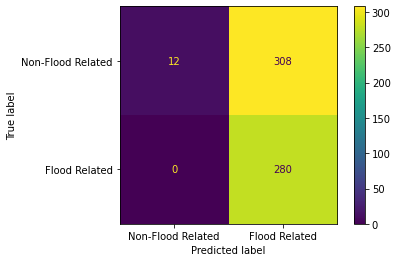

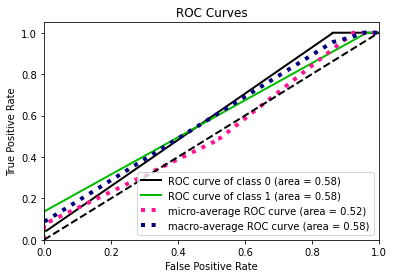


========== Decision Tree ==========
Decision Tree Test Accuracy: 0.4716666666666667
Accuracy score: 0.4716666666666667
F1-score: 0.33116483516483514
Precision-score: 0.634453781512605
Recall-score: 0.5044642857142857
ROC-AUC-score: 0.5450223214285714
[[  4 316]
 [  1 279]]


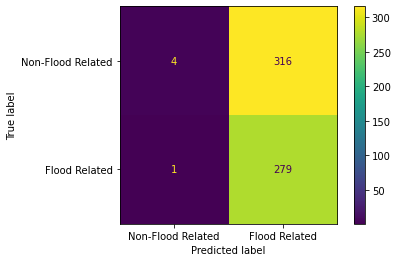

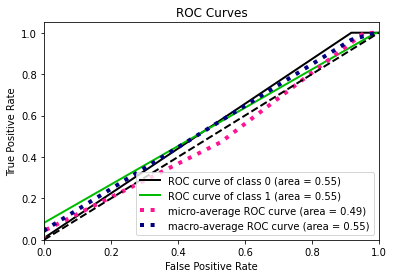


========== Random Forest ==========
Random Forest Test Accuracy: 0.47333333333333333
Accuracy score: 0.47333333333333333
F1-score: 0.3319803822086927
Precision-score: 0.7348993288590604
Recall-score: 0.50625
ROC-AUC-score: 0.5799330357142857
[[  4 316]
 [  0 280]]


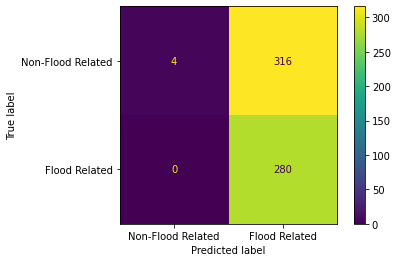

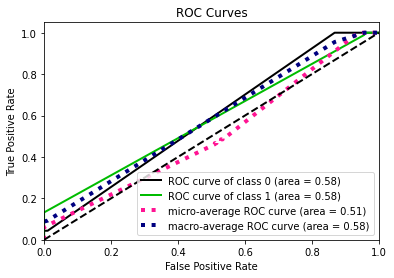


========== Support Vector Machine (SVM) ==========
Support Vector Machine (SVM) Test Accuracy: 0.595
Accuracy score: 0.595
F1-score: 0.4812107928081155
Precision-score: 0.7714932126696832
Recall-score: 0.5662946428571428
ROC-AUC-score: 0.5871149553571428
[[319   1]
 [242  38]]


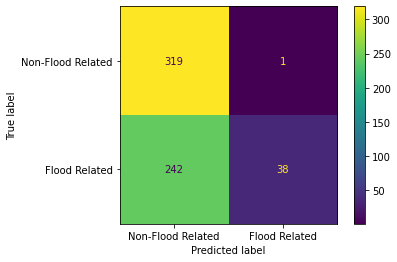

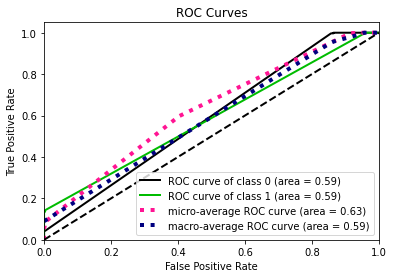


========== K-Nearest Neighbour (KNN) ==========
K-Nearest Neighbour (KNN) Test Accuracy: 0.4633333333333333
Accuracy score: 0.4633333333333333
F1-score: 0.31662870159453305
Precision-score: 0.23244147157190637
Recall-score: 0.49642857142857144
ROC-AUC-score: 0.49158482142857146
[[  0 320]
 [  2 278]]


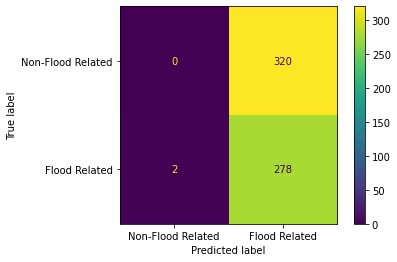

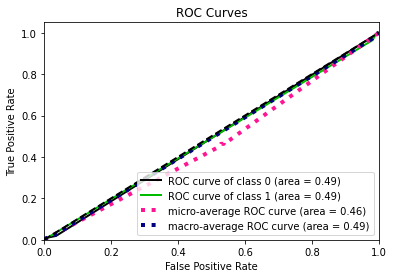


========== Multinomial Naive Bayes ==========
Multinomial Naive Bayes Test Accuracy: 0.6
Accuracy score: 0.6
F1-score: 0.4906549328654905
Precision-score: 0.7739375320020481
Recall-score: 0.5716517857142857
ROC-AUC-score: 0.5904520089285713
[[319   1]
 [239  41]]


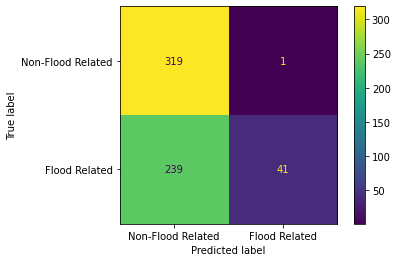

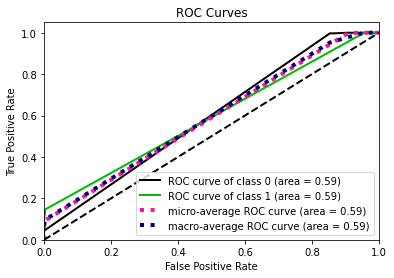

------------------------------------------
Best Accuracy Classifier: Multinomial Naive Bayes


In [9]:
#@title Bag of Words (Trigram)
#Vectorizing -> Balancing -> Training
flood_pipeline_lr = Pipeline([('cv', CountVectorizer(ngram_range=(3,3))),
                              ('smote', SMOTE(random_state=42)),
                              ('lr_model', LogisticRegression())])

flood_pipeline_dt = Pipeline([('cv', CountVectorizer(ngram_range=(3,3))),
                              ('smote', SMOTE(random_state=42)),
                              ('dt_model', DecisionTreeClassifier())])

flood_pipeline_rf = Pipeline([('cv', CountVectorizer(ngram_range=(3,3))),
                              ('smote', SMOTE(random_state=42)),
                              ('rf_model', RandomForestClassifier())])

flood_pipeline_svm = Pipeline([('cv', CountVectorizer(ngram_range=(3,3))),
                               ('smote', SMOTE(random_state=42)),
                               ('svm_model', CalibratedClassifierCV(SGDClassifier()))])

flood_pipeline_knn = Pipeline([('cv', CountVectorizer(ngram_range=(3,3))),
                               ('smote', SMOTE(random_state=42)),
                               ('knn_model', KNeighborsClassifier())])

flood_pipeline_mnb = Pipeline([('cv', CountVectorizer(ngram_range=(3,3))),
                               ('smote', SMOTE(random_state=42)),
                               ('mnb_model', MultinomialNB())])

#List of Pipelines
pipelines = [flood_pipeline_lr, flood_pipeline_dt, flood_pipeline_rf, flood_pipeline_svm, flood_pipeline_knn, flood_pipeline_mnb]

#Dictionary of Pipelines
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Random Forest', 3: 'Support Vector Machine (SVM)', 4: 'K-Nearest Neighbour (KNN)', 5: 'Multinomial Naive Bayes'}

start = datetime.now()

#Fit the Pipelines
for pipe in pipelines:
    pipe.fit(X_flood_train, y_flood_train)
    
stop = datetime.now()
execution_time = stop-start
print("Execution time:", execution_time)

class_names = ['Non-Flood Related', 'Flood Related']

for i, model in enumerate(pipelines):
    flood_y_predict_test = model.predict(X_flood_test)
    flood_y_predict_proba = model.predict_proba(X_flood_test)
    print("\n========== {} ==========".format(pipe_dict[i]))
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_flood_test,y_flood_test)))
    print('Accuracy score:',accuracy_score(y_flood_test, flood_y_predict_test))
    print('F1-score:',f1_score(y_flood_test, flood_y_predict_test, average='macro'))
    print('Precision-score:',precision_score(y_flood_test, flood_y_predict_test, average='macro'))
    print('Recall-score:',recall_score(y_flood_test, flood_y_predict_test, average='macro'))
    print('ROC-AUC-score:',roc_auc_score(y_flood_test, flood_y_predict_proba[:, 1], average='macro', multi_class='ovo'))
    print(confusion_matrix(y_flood_test, flood_y_predict_test)) 
    
    (ConfusionMatrixDisplay((metrics.confusion_matrix(y_flood_test, flood_y_predict_test)),display_labels=class_names)).plot()
    skplt.metrics.plot_roc(y_flood_test, flood_y_predict_proba)
    plt.show()

#Best Accuracy Model    
best_accuracy = 0.0
best_classifier = 0
best_pipeline = ""

print('------------------------------------------')
for i, model in enumerate(pipelines):
    if model.score(X_flood_test,y_flood_test)>best_accuracy:
        best_accuracy=model.score(X_flood_test,y_flood_test)
        best_pipeline=model
        best_classifier=i
print('Best Accuracy Classifier: {}'.format(pipe_dict[best_classifier]))

___

Execution time: 0:00:03.035183

========== Logistic Regression ==========
Logistic Regression Test Accuracy: 0.8883333333333333
Accuracy score: 0.8883333333333333
F1-score: 0.8863633151382722
Precision-score: 0.8971382008576151
Recall-score: 0.8834821428571429
ROC-AUC-score: 0.9484821428571429
[[306  14]
 [ 53 227]]


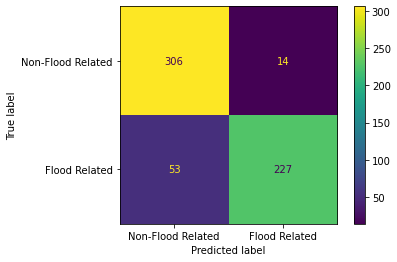

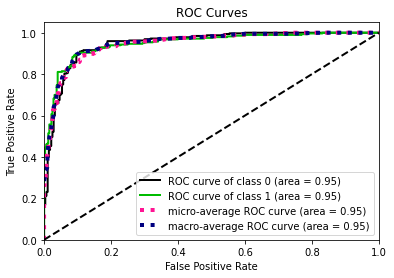


========== Decision Tree ==========
Decision Tree Test Accuracy: 0.7983333333333333
Accuracy score: 0.7983333333333333
F1-score: 0.7982655281358457
Precision-score: 0.8050348723593033
Recall-score: 0.803125
ROC-AUC-score: 0.803125
[[234  86]
 [ 35 245]]


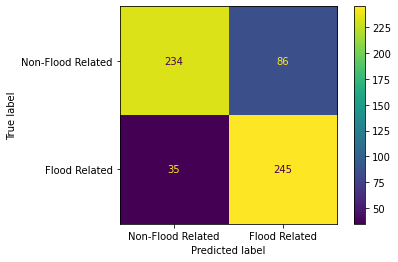

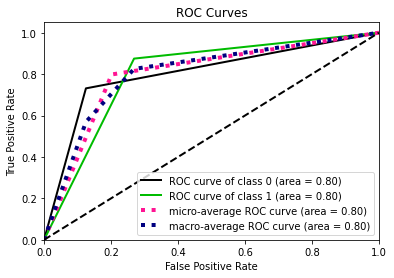


========== Random Forest ==========
Random Forest Test Accuracy: 0.83
Accuracy score: 0.83
F1-score: 0.83
Precision-score: 0.8337053571428571
Recall-score: 0.8337053571428571
ROC-AUC-score: 0.9087276785714286
[[249  71]
 [ 31 249]]


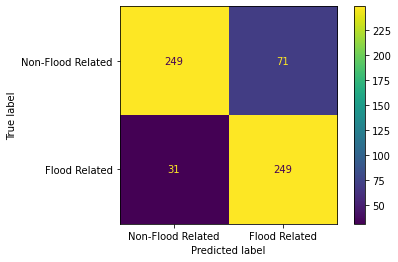

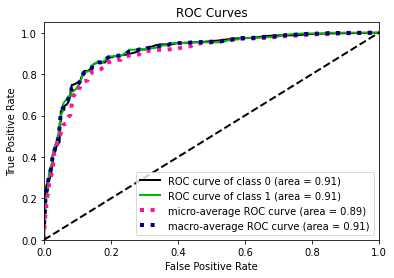


========== Support Vector Machine (SVM) ==========
Support Vector Machine (SVM) Test Accuracy: 0.89
Accuracy score: 0.89
F1-score: 0.8888888888888888
Precision-score: 0.8925339366515836
Recall-score: 0.8872767857142857
ROC-AUC-score: 0.95625
[[297  23]
 [ 43 237]]


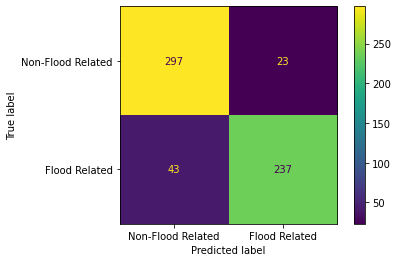

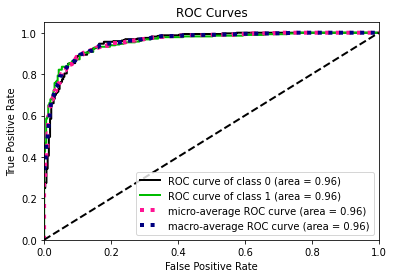


========== K-Nearest Neighbour (KNN) ==========
K-Nearest Neighbour (KNN) Test Accuracy: 0.475
Accuracy score: 0.475
F1-score: 0.33538461538461534
Precision-score: 0.7352941176470589
Recall-score: 0.5078125
ROC-AUC-score: 0.5504296875
[[  5 315]
 [  0 280]]


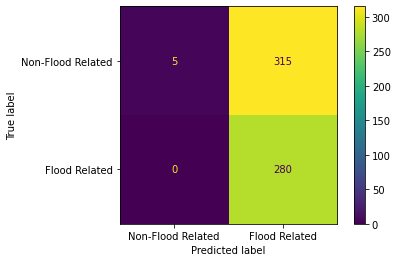

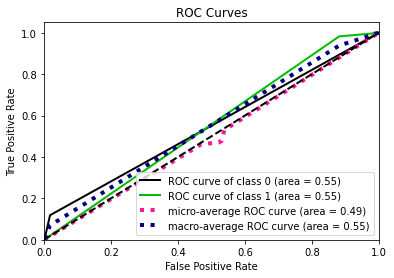


========== Multinomial Naive Bayes ==========
Multinomial Naive Bayes Test Accuracy: 0.9083333333333333
Accuracy score: 0.9083333333333333
F1-score: 0.907903292875901
Precision-score: 0.9079991960606975
Recall-score: 0.9078125
ROC-AUC-score: 0.9712388392857142
[[293  27]
 [ 28 252]]


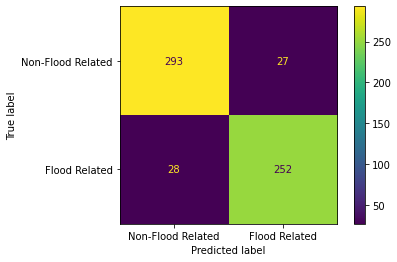

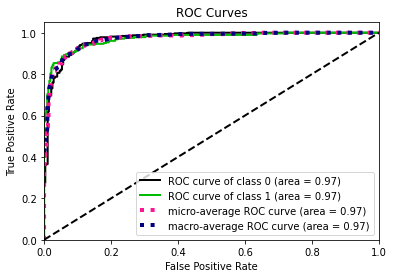

------------------------------------------
Best Accuracy Classifier: Multinomial Naive Bayes


In [10]:
#@title TF-IDF (Unigram)
#Vectorizing -> Balancing -> Training
flood_pipeline_lr = Pipeline([('cv', TfidfVectorizer(ngram_range=(1,1))),
                              ('smote', SMOTE(random_state=42)),
                              ('lr_model', LogisticRegression())])

flood_pipeline_dt = Pipeline([('cv', TfidfVectorizer(ngram_range=(1,1))),
                              ('smote', SMOTE(random_state=42)),
                              ('dt_model', DecisionTreeClassifier())])

flood_pipeline_rf = Pipeline([('cv', TfidfVectorizer(ngram_range=(1,1))),
                              ('smote', SMOTE(random_state=42)),
                              ('rf_model', RandomForestClassifier())])

flood_pipeline_svm = Pipeline([('cv', TfidfVectorizer(ngram_range=(1,1))),
                               ('smote', SMOTE(random_state=42)),
                               ('svm_model', CalibratedClassifierCV(SGDClassifier()))])

flood_pipeline_knn = Pipeline([('cv', TfidfVectorizer(ngram_range=(1,1))),
                               ('smote', SMOTE(random_state=42)),
                               ('knn_model', KNeighborsClassifier())])

flood_pipeline_mnb = Pipeline([('cv', TfidfVectorizer(ngram_range=(1,1))),
                               ('smote', SMOTE(random_state=42)),
                               ('mnb_model', MultinomialNB())])

#List of Pipelines
pipelines = [flood_pipeline_lr, flood_pipeline_dt, flood_pipeline_rf, flood_pipeline_svm, flood_pipeline_knn, flood_pipeline_mnb]

#Dictionary of Pipelines
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Random Forest', 3: 'Support Vector Machine (SVM)', 4: 'K-Nearest Neighbour (KNN)', 5: 'Multinomial Naive Bayes'}

start = datetime.now()

#Fit the Pipelines
for pipe in pipelines:
    pipe.fit(X_flood_train, y_flood_train)
    
stop = datetime.now()
execution_time = stop-start
print("Execution time:", execution_time)

class_names = ['Non-Flood Related', 'Flood Related']

for i, model in enumerate(pipelines):
    flood_y_predict_test = model.predict(X_flood_test)
    flood_y_predict_proba = model.predict_proba(X_flood_test)
    print("\n========== {} ==========".format(pipe_dict[i]))
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_flood_test,y_flood_test)))
    print('Accuracy score:',accuracy_score(y_flood_test, flood_y_predict_test))
    print('F1-score:',f1_score(y_flood_test, flood_y_predict_test, average='macro'))
    print('Precision-score:',precision_score(y_flood_test, flood_y_predict_test, average='macro'))
    print('Recall-score:',recall_score(y_flood_test, flood_y_predict_test, average='macro'))
    print('ROC-AUC-score:',roc_auc_score(y_flood_test, flood_y_predict_proba[:, 1], average='macro', multi_class='ovo'))
    print(confusion_matrix(y_flood_test, flood_y_predict_test)) 
    
    (ConfusionMatrixDisplay((metrics.confusion_matrix(y_flood_test, flood_y_predict_test)),display_labels=class_names)).plot()
    skplt.metrics.plot_roc(y_flood_test, flood_y_predict_proba)
    plt.show()

#Best Accuracy Model    
best_accuracy = 0.0
best_classifier = 0
best_pipeline = ""

print('------------------------------------------')
for i, model in enumerate(pipelines):
    if model.score(X_flood_test,y_flood_test)>best_accuracy:
        best_accuracy=model.score(X_flood_test,y_flood_test)
        best_pipeline=model
        best_classifier=i
print('Best Accuracy Classifier: {}'.format(pipe_dict[best_classifier]))

___

Execution time: 0:00:04.783697

========== Logistic Regression ==========
Logistic Regression Test Accuracy: 0.78
Accuracy score: 0.78
F1-score: 0.769510150866083
Precision-score: 0.8079044117647058
Recall-score: 0.7691964285714286
ROC-AUC-score: 0.8272488839285715
[[298  22]
 [110 170]]


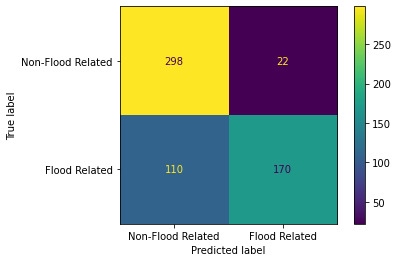

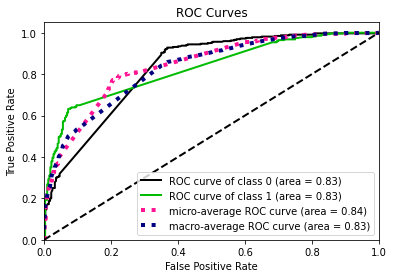


========== Decision Tree ==========
Decision Tree Test Accuracy: 0.5416666666666666
Accuracy score: 0.5416666666666666
F1-score: 0.4666666666666666
Precision-score: 0.7068390325271059
Recall-score: 0.5691964285714286
ROC-AUC-score: 0.7059430803571428
[[ 50 270]
 [  5 275]]


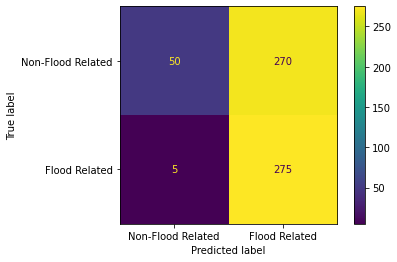

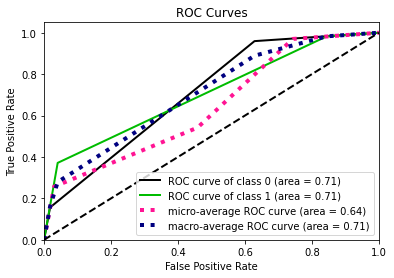


========== Random Forest ==========
Random Forest Test Accuracy: 0.5233333333333333
Accuracy score: 0.5233333333333333
F1-score: 0.43253968253968256
Precision-score: 0.7098214285714286
Recall-score: 0.5524553571428572
ROC-AUC-score: 0.8127120535714285
[[ 37 283]
 [  3 277]]


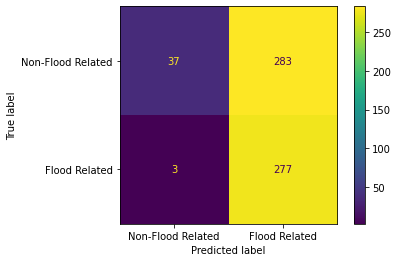

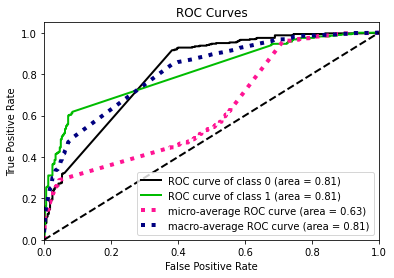


========== Support Vector Machine (SVM) ==========
Support Vector Machine (SVM) Test Accuracy: 0.785
Accuracy score: 0.785
F1-score: 0.777662236189349
Precision-score: 0.801660595280157
Recall-score: 0.7763392857142857
ROC-AUC-score: 0.8275837053571429
[[290  30]
 [ 99 181]]


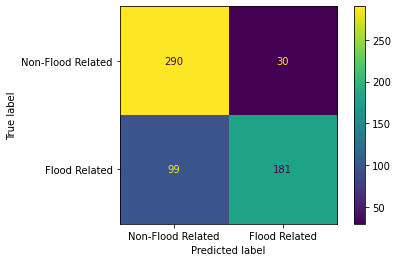

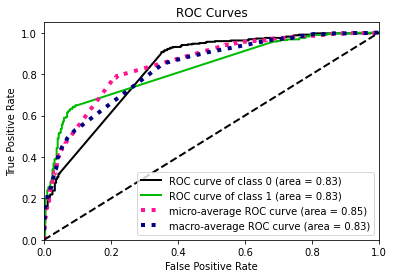


========== K-Nearest Neighbour (KNN) ==========
K-Nearest Neighbour (KNN) Test Accuracy: 0.475
Accuracy score: 0.475
F1-score: 0.3524714008202029
Precision-score: 0.5507292327203551
Recall-score: 0.50625
ROC-AUC-score: 0.6385379464285714
[[ 12 308]
 [  7 273]]


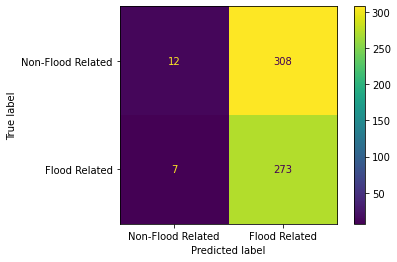

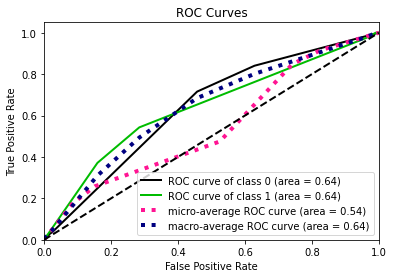


========== Multinomial Naive Bayes ==========
Multinomial Naive Bayes Test Accuracy: 0.7816666666666666
Accuracy score: 0.7816666666666666
F1-score: 0.7747689662583279
Precision-score: 0.7959830866807611
Recall-score: 0.7734375
ROC-AUC-score: 0.8306975446428569
[[287  33]
 [ 98 182]]


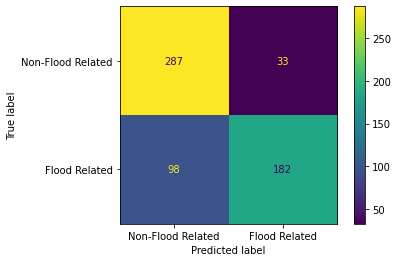

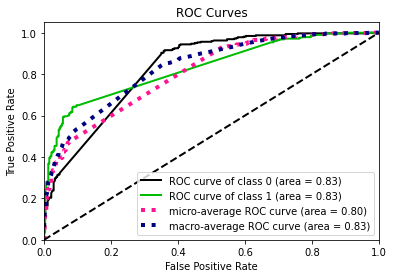

------------------------------------------
Best Accuracy Classifier: Support Vector Machine (SVM)


In [11]:
#@title TF-IDF (Bigram)
#Vectorizing -> Balancing -> Training
flood_pipeline_lr = Pipeline([('cv', TfidfVectorizer(ngram_range=(2,2))),
                              ('smote', SMOTE(random_state=42)),
                              ('lr_model', LogisticRegression())])

flood_pipeline_dt = Pipeline([('cv', TfidfVectorizer(ngram_range=(2,2))),
                              ('smote', SMOTE(random_state=42)),
                              ('dt_model', DecisionTreeClassifier())])

flood_pipeline_rf = Pipeline([('cv', TfidfVectorizer(ngram_range=(2,2))),
                              ('smote', SMOTE(random_state=42)),
                              ('rf_model', RandomForestClassifier())])

flood_pipeline_svm = Pipeline([('cv', TfidfVectorizer(ngram_range=(2,2))),
                               ('smote', SMOTE(random_state=42)),
                               ('svm_model', CalibratedClassifierCV(SGDClassifier()))])

flood_pipeline_knn = Pipeline([('cv', TfidfVectorizer(ngram_range=(2,2))),
                               ('smote', SMOTE(random_state=42)),
                               ('knn_model', KNeighborsClassifier())])

flood_pipeline_mnb = Pipeline([('cv', TfidfVectorizer(ngram_range=(2,2))),
                               ('smote', SMOTE(random_state=42)),
                               ('mnb_model', MultinomialNB())])

#List of Pipelines
pipelines = [flood_pipeline_lr, flood_pipeline_dt, flood_pipeline_rf, flood_pipeline_svm, flood_pipeline_knn, flood_pipeline_mnb]

#Dictionary of Pipelines
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Random Forest', 3: 'Support Vector Machine (SVM)', 4: 'K-Nearest Neighbour (KNN)', 5: 'Multinomial Naive Bayes'}

start = datetime.now()

#Fit the Pipelines
for pipe in pipelines:
    pipe.fit(X_flood_train, y_flood_train)
    
stop = datetime.now()
execution_time = stop-start
print("Execution time:", execution_time)

class_names = ['Non-Flood Related', 'Flood Related']

for i, model in enumerate(pipelines):
    flood_y_predict_test = model.predict(X_flood_test)
    flood_y_predict_proba = model.predict_proba(X_flood_test)
    print("\n========== {} ==========".format(pipe_dict[i]))
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_flood_test,y_flood_test)))
    print('Accuracy score:',accuracy_score(y_flood_test, flood_y_predict_test))
    print('F1-score:',f1_score(y_flood_test, flood_y_predict_test, average='macro'))
    print('Precision-score:',precision_score(y_flood_test, flood_y_predict_test, average='macro'))
    print('Recall-score:',recall_score(y_flood_test, flood_y_predict_test, average='macro'))
    print('ROC-AUC-score:',roc_auc_score(y_flood_test, flood_y_predict_proba[:, 1], average='macro', multi_class='ovo'))
    print(confusion_matrix(y_flood_test, flood_y_predict_test)) 
    
    (ConfusionMatrixDisplay((metrics.confusion_matrix(y_flood_test, flood_y_predict_test)),display_labels=class_names)).plot()
    skplt.metrics.plot_roc(y_flood_test, flood_y_predict_proba)
    plt.show()

#Best Accuracy Model    
best_accuracy = 0.0
best_classifier = 0
best_pipeline = ""

print('------------------------------------------')
for i, model in enumerate(pipelines):
    if model.score(X_flood_test,y_flood_test)>best_accuracy:
        best_accuracy=model.score(X_flood_test,y_flood_test)
        best_pipeline=model
        best_classifier=i
print('Best Accuracy Classifier: {}'.format(pipe_dict[best_classifier]))

___

Execution time: 0:00:07.534159

========== Logistic Regression ==========
Logistic Regression Test Accuracy: 0.5983333333333334
Accuracy score: 0.5983333333333334
F1-score: 0.48752299235537405
Precision-score: 0.7731358261704262
Recall-score: 0.5698660714285714
ROC-AUC-score: 0.5871037946428571
[[319   1]
 [240  40]]


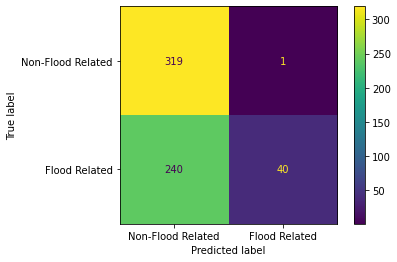

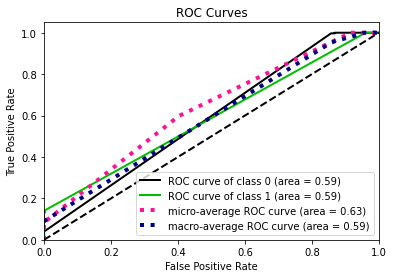


========== Decision Tree ==========
Decision Tree Test Accuracy: 0.47833333333333333
Accuracy score: 0.47833333333333333
F1-score: 0.3446375789976933
Precision-score: 0.6804850535815002
Recall-score: 0.5107142857142857
ROC-AUC-score: 0.5507589285714285
[[  8 312]
 [  1 279]]


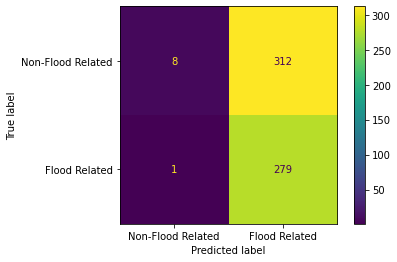

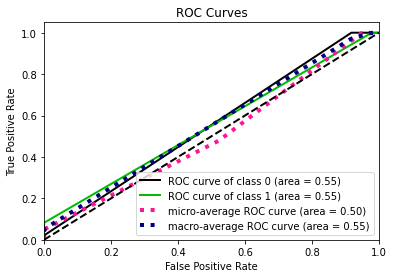


========== Random Forest ==========
Random Forest Test Accuracy: 0.48
Accuracy score: 0.48
F1-score: 0.34549116133363167
Precision-score: 0.7364864864864865
Recall-score: 0.5125
ROC-AUC-score: 0.5884709821428571
[[  8 312]
 [  0 280]]


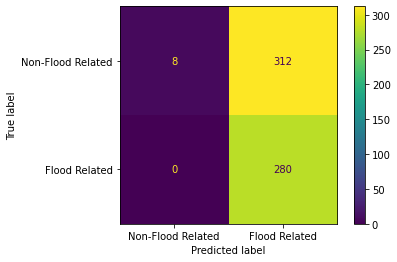

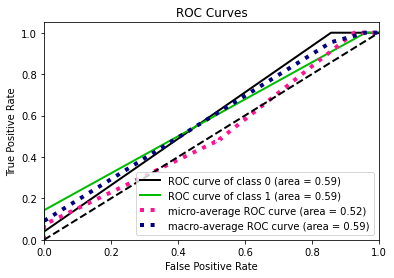


========== Support Vector Machine (SVM) ==========
Support Vector Machine (SVM) Test Accuracy: 0.5966666666666667
Accuracy score: 0.5966666666666667
F1-score: 0.484375
Precision-score: 0.7723214285714286
Recall-score: 0.5680803571428571
ROC-AUC-score: 0.5834095982142856
[[319   1]
 [241  39]]


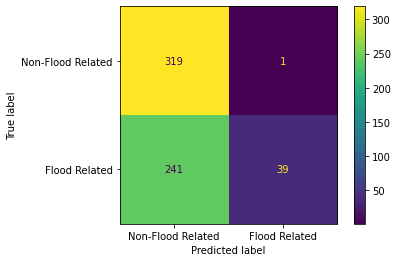

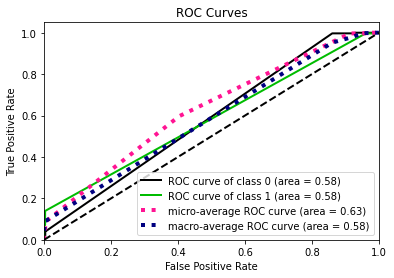


========== K-Nearest Neighbour (KNN) ==========
K-Nearest Neighbour (KNN) Test Accuracy: 0.5683333333333334
Accuracy score: 0.5683333333333334
F1-score: 0.4535384615384615
Precision-score: 0.6441441441441441
Recall-score: 0.5401785714285714
ROC-AUC-score: 0.5491629464285713
[[308  12]
 [247  33]]


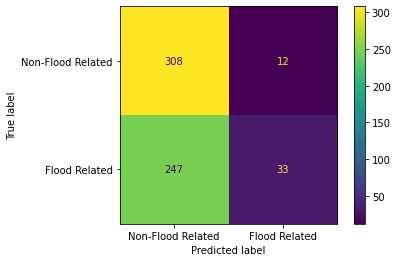

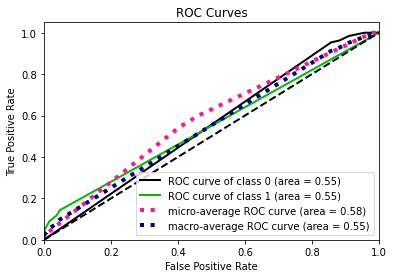


========== Multinomial Naive Bayes ==========
Multinomial Naive Bayes Test Accuracy: 0.6
Accuracy score: 0.6
F1-score: 0.4906549328654905
Precision-score: 0.7739375320020481
Recall-score: 0.5716517857142857
ROC-AUC-score: 0.5904854910714284
[[319   1]
 [239  41]]


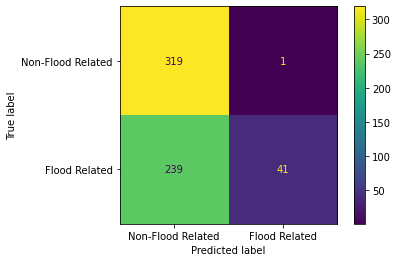

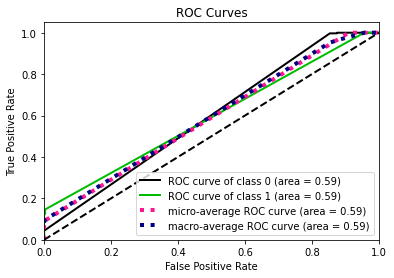

------------------------------------------
Best Accuracy Classifier: Multinomial Naive Bayes


In [12]:
#@title TF-IDF (Trigram)
#Vectorizing -> Balancing -> Training
flood_pipeline_lr = Pipeline([('cv', TfidfVectorizer(ngram_range=(3,3))),
                              ('smote', SMOTE(random_state=42)),
                              ('lr_model', LogisticRegression())])

flood_pipeline_dt = Pipeline([('cv', TfidfVectorizer(ngram_range=(3,3))),
                              ('smote', SMOTE(random_state=42)),
                              ('dt_model', DecisionTreeClassifier())])

flood_pipeline_rf = Pipeline([('cv', TfidfVectorizer(ngram_range=(3,3))),
                              ('smote', SMOTE(random_state=42)),
                              ('rf_model', RandomForestClassifier())])

flood_pipeline_svm = Pipeline([('cv', TfidfVectorizer(ngram_range=(3,3))),
                               ('smote', SMOTE(random_state=42)),
                               ('svm_model', CalibratedClassifierCV(SGDClassifier()))])

flood_pipeline_knn = Pipeline([('cv', TfidfVectorizer(ngram_range=(3,3))),
                               ('smote', SMOTE(random_state=42)),
                               ('knn_model', KNeighborsClassifier())])

flood_pipeline_mnb = Pipeline([('cv', TfidfVectorizer(ngram_range=(3,3))),
                               ('smote', SMOTE(random_state=42)),
                               ('mnb_model', MultinomialNB())])

#List of Pipelines
pipelines = [flood_pipeline_lr, flood_pipeline_dt, flood_pipeline_rf, flood_pipeline_svm, flood_pipeline_knn, flood_pipeline_mnb]

#Dictionary of Pipelines
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Random Forest', 3: 'Support Vector Machine (SVM)', 4: 'K-Nearest Neighbour (KNN)', 5: 'Multinomial Naive Bayes'}

start = datetime.now()

#Fit the Pipelines
for pipe in pipelines:
    pipe.fit(X_flood_train, y_flood_train)
    
stop = datetime.now()
execution_time = stop-start
print("Execution time:", execution_time)

class_names = ['Non-Flood Related', 'Flood Related']

for i, model in enumerate(pipelines):
    flood_y_predict_test = model.predict(X_flood_test)
    flood_y_predict_proba = model.predict_proba(X_flood_test)
    print("\n========== {} ==========".format(pipe_dict[i]))
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_flood_test,y_flood_test)))
    print('Accuracy score:',accuracy_score(y_flood_test, flood_y_predict_test))
    print('F1-score:',f1_score(y_flood_test, flood_y_predict_test, average='macro'))
    print('Precision-score:',precision_score(y_flood_test, flood_y_predict_test, average='macro'))
    print('Recall-score:',recall_score(y_flood_test, flood_y_predict_test, average='macro'))
    print('ROC-AUC-score:',roc_auc_score(y_flood_test, flood_y_predict_proba[:, 1], average='macro', multi_class='ovo'))
    print(confusion_matrix(y_flood_test, flood_y_predict_test)) 
    
    (ConfusionMatrixDisplay((metrics.confusion_matrix(y_flood_test, flood_y_predict_test)),display_labels=class_names)).plot()
    skplt.metrics.plot_roc(y_flood_test, flood_y_predict_proba)
    plt.show()

#Best Accuracy Model    
best_accuracy = 0.0
best_classifier = 0
best_pipeline = ""

print('------------------------------------------')
for i, model in enumerate(pipelines):
    if model.score(X_flood_test,y_flood_test)>best_accuracy:
        best_accuracy=model.score(X_flood_test,y_flood_test)
        best_pipeline=model
        best_classifier=i
print('Best Accuracy Classifier: {}'.format(pipe_dict[best_classifier]))

___

In [13]:
#@title Hyperparameter Tuning (GridSearchCV)
#Bag of Words (Unigram) - Multinomial Naive Bayes
#https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

flood_pipeline_mnb = Pipeline([('cv', CountVectorizer(ngram_range=(1,1))),
                               ('smote', SMOTE(random_state=42)),
                               ('mnb_model', MultinomialNB())])

param_grid = [{'mnb_model__alpha': np.linspace(0, 2, 20), 
               'mnb_model__fit_prior': [True, False]}]

start = datetime.now()

grid_search = GridSearchCV(flood_pipeline_mnb, param_grid, cv=3, return_train_score= True)
flood_best_model = grid_search.fit(X_flood_train, y_flood_train)

stop = datetime.now()
execution_time = stop-start 
print("Execution time:", execution_time)

print("Best score:", grid_search.best_score_)
print("Best params:", grid_search.best_params_)
print(flood_best_model.best_estimator_)
print("The mean accuracy of the model is:",flood_best_model.score(X_flood_test,y_flood_test))
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

Execution time: 0:00:08.999341
Best score: 0.9245833333333334
Best params: {'mnb_model__alpha': 0.10526315789473684, 'mnb_model__fit_prior': True}
Pipeline(steps=[('cv', CountVectorizer()), ('smote', SMOTE(random_state=42)),
                ('mnb_model', MultinomialNB(alpha=0.10526315789473684))])
The mean accuracy of the model is: 0.9183333333333333
0.9079166666666666 {'mnb_model__alpha': 0.0, 'mnb_model__fit_prior': True}
0.9079166666666666 {'mnb_model__alpha': 0.0, 'mnb_model__fit_prior': False}
0.9245833333333334 {'mnb_model__alpha': 0.10526315789473684, 'mnb_model__fit_prior': True}
0.9245833333333334 {'mnb_model__alpha': 0.10526315789473684, 'mnb_model__fit_prior': False}
0.9225 {'mnb_model__alpha': 0.21052631578947367, 'mnb_model__fit_prior': True}
0.9225 {'mnb_model__alpha': 0.21052631578947367, 'mnb_model__fit_prior': False}
0.9216666666666667 {'mnb_model__alpha': 0.3157894736842105, 'mnb_model__fit_prior': True}
0.9216666666666667 {'mnb_model__alpha': 0.3157894736842105, 'mnb

___

Execution time: 0:00:00.074940

========== Multinomial Naive Bayes ==========
Multinomial Naive Bayes Test Accuracy: 0.9183333333333333
Accuracy score: 0.9183333333333333
F1-score: 0.9177389975909278
Precision-score: 0.9193667943260818
Recall-score: 0.9167410714285715
ROC-AUC-score: 0.9697321428571428
[[301  19]
 [ 30 250]]


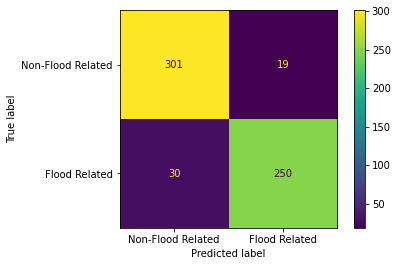

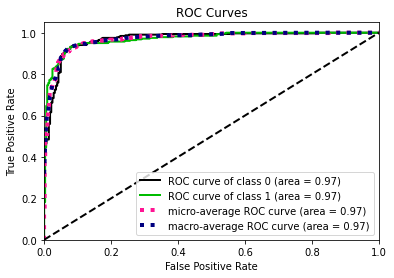

------------------------------------------
Best Accuracy Classifier: Multinomial Naive Bayes


In [14]:
#@title Save Best Model (Flood - BOW - Unigram - MNB)
flood_pipeline_mnb = Pipeline([('cv', CountVectorizer(ngram_range=(1,1))),
                               ('smote', SMOTE(random_state=42)),
                               ('mnb_model', MultinomialNB(alpha=0.10526315789473684))])

#List of Pipelines
pipelines = [flood_pipeline_mnb]

#Dictionary of Pipelines
pipe_dict = {0: 'Multinomial Naive Bayes'}

start = datetime.now()

#Fit the Pipelines
for pipe in pipelines:
    pipe.fit(X_flood_train, y_flood_train)
    
stop = datetime.now()
execution_time = stop-start
print("Execution time:", execution_time)

class_names = ['Non-Flood Related', 'Flood Related']

for i, model in enumerate(pipelines):
    flood_y_predict_test = model.predict(X_flood_test)
    flood_y_predict_proba = model.predict_proba(X_flood_test)
    print("\n========== {} ==========".format(pipe_dict[i]))
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_flood_test,y_flood_test)))
    print('Accuracy score:',accuracy_score(y_flood_test, flood_y_predict_test))
    print('F1-score:',f1_score(y_flood_test, flood_y_predict_test, average='macro'))
    print('Precision-score:',precision_score(y_flood_test, flood_y_predict_test, average='macro'))
    print('Recall-score:',recall_score(y_flood_test, flood_y_predict_test, average='macro'))
    print('ROC-AUC-score:',roc_auc_score(y_flood_test, flood_y_predict_proba[:, 1], average='macro', multi_class='ovo'))
    print(confusion_matrix(y_flood_test, flood_y_predict_test)) 
    
    (ConfusionMatrixDisplay((metrics.confusion_matrix(y_flood_test, flood_y_predict_test)),display_labels=class_names)).plot()
    skplt.metrics.plot_roc(y_flood_test, flood_y_predict_proba)
    plt.show()

#Best Accuracy Model    
best_accuracy = 0.0
best_classifier = 0
best_pipeline = ""

print('------------------------------------------')
for i, model in enumerate(pipelines):
    if model.score(X_flood_test,y_flood_test)>best_accuracy:
        best_accuracy=model.score(X_flood_test,y_flood_test)
        best_pipeline=model
        best_classifier=i
print('Best Accuracy Classifier: {}'.format(pipe_dict[best_classifier]))

model_file = open("english_flood_related_mnb.pkl","wb")
joblib.dump(flood_pipeline_mnb,model_file)
model_file.close()

___

# Sentiment (Multiclass)

Execution time: 0:00:03.579124

========== Logistic Regression ==========
Logistic Regression Test Accuracy: 0.5783333333333334
Accuracy score: 0.5783333333333334
F1-score: 0.5821478297334312
Precision-score: 0.5844850166316135
Recall-score: 0.5834622570255362
ROC-AUC-score: 0.7597828929317183
[[103  49  14]
 [ 68 125  42]
 [ 20  60 119]]


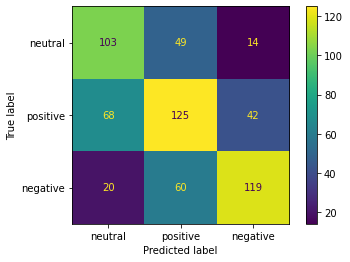

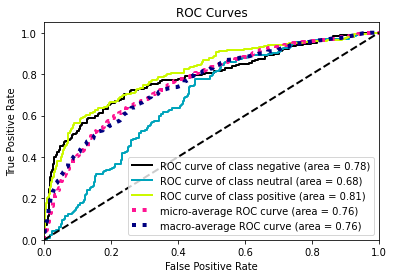


========== Decision Tree ==========
Decision Tree Test Accuracy: 0.505
Accuracy score: 0.505
F1-score: 0.5063307907510531
Precision-score: 0.5121750402023056
Recall-score: 0.5117153313349624
ROC-AUC-score: 0.6600588497473269
[[ 95  43  28]
 [ 85 107  43]
 [ 45  53 101]]


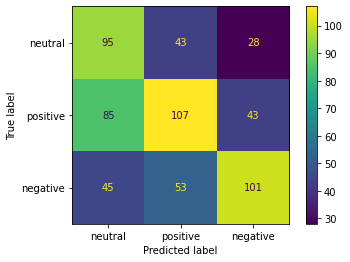

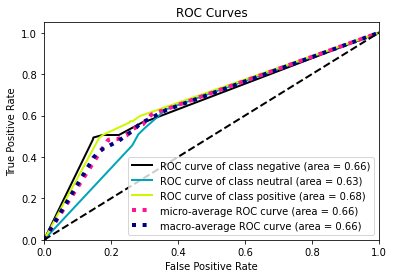


========== Random Forest ==========
Random Forest Test Accuracy: 0.5166666666666667
Accuracy score: 0.5166666666666667
F1-score: 0.5188366714137098
Precision-score: 0.522510374805876
Recall-score: 0.5292875983781163
ROC-AUC-score: 0.7175206653621865
[[101  40  25]
 [ 98  92  45]
 [ 31  51 117]]


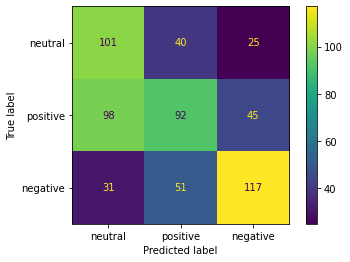

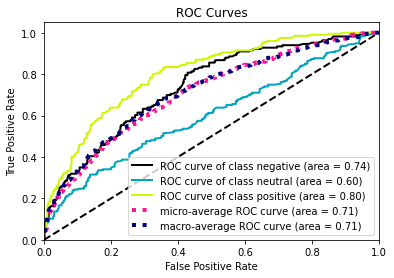


========== Support Vector Machine (SVM) ==========
Support Vector Machine (SVM) Test Accuracy: 0.5683333333333334
Accuracy score: 0.5683333333333334
F1-score: 0.5714815505486248
Precision-score: 0.5712387028176501
Recall-score: 0.5789259894276132
ROC-AUC-score: 0.7512357137305772
[[108  43  15]
 [ 76 110  49]
 [ 25  51 123]]


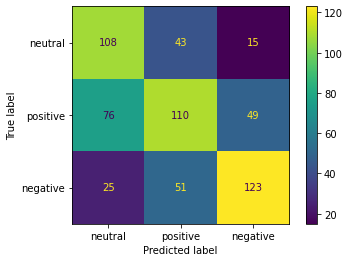

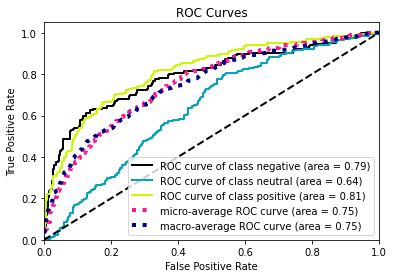


========== K-Nearest Neighbour (KNN) ==========
K-Nearest Neighbour (KNN) Test Accuracy: 0.34
Accuracy score: 0.34
F1-score: 0.30999398573189657
Precision-score: 0.3822266880879979
Recall-score: 0.37620233956246246
ROC-AUC-score: 0.5692314967128216
[[119   7  40]
 [162  20  53]
 [115  19  65]]


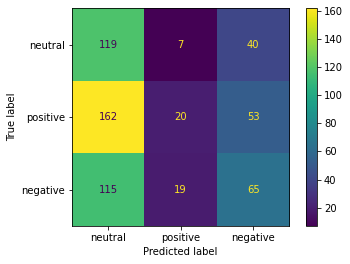

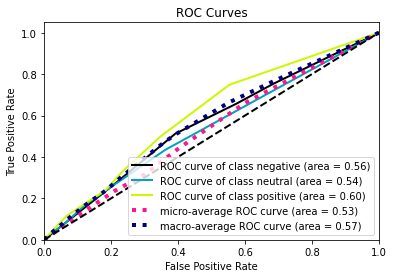


========== Multinomial Naive Bayes ==========
Multinomial Naive Bayes Test Accuracy: 0.5766666666666667
Accuracy score: 0.5766666666666667
F1-score: 0.5734482251238655
Precision-score: 0.5714487214487214
Recall-score: 0.5799479753720324
ROC-AUC-score: 0.7546455897362572
[[ 89  51  26]
 [ 68 114  53]
 [ 23  33 143]]


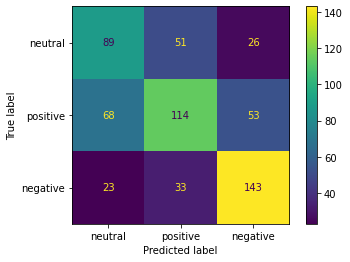

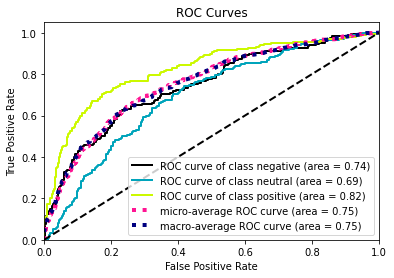

------------------------------------------
Best Accuracy Classifier: Logistic Regression


In [15]:
#@title Bag of Words (Unigram)
#Vectorizing -> Balancing -> Training
sentiment_pipeline_lr = Pipeline([('cv', CountVectorizer(ngram_range=(1,1))),
                              ('smote', SMOTE(random_state=42)),
                              ('lr_model', LogisticRegression())])

sentiment_pipeline_dt = Pipeline([('cv', CountVectorizer(ngram_range=(1,1))),
                              ('smote', SMOTE(random_state=42)),
                              ('dt_model', DecisionTreeClassifier())])

sentiment_pipeline_rf = Pipeline([('cv', CountVectorizer(ngram_range=(1,1))),
                              ('smote', SMOTE(random_state=42)),
                              ('rf_model', RandomForestClassifier())])

sentiment_pipeline_svm = Pipeline([('cv', CountVectorizer(ngram_range=(1,1))),
                               ('smote', SMOTE(random_state=42)),
                               ('svm_model', CalibratedClassifierCV(SGDClassifier()))])

sentiment_pipeline_knn = Pipeline([('cv', CountVectorizer(ngram_range=(1,1))),
                               ('smote', SMOTE(random_state=42)),
                               ('knn_model', KNeighborsClassifier())])

sentiment_pipeline_mnb = Pipeline([('cv', CountVectorizer(ngram_range=(1,1))),
                               ('smote', SMOTE(random_state=42)),
                               ('mnb_model', MultinomialNB())])

#List of Pipelines
pipelines = [sentiment_pipeline_lr, sentiment_pipeline_dt, sentiment_pipeline_rf, sentiment_pipeline_svm, sentiment_pipeline_knn, sentiment_pipeline_mnb]

#Dictionary of Pipelines
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Random Forest', 3: 'Support Vector Machine (SVM)', 4: 'K-Nearest Neighbour (KNN)', 5: 'Multinomial Naive Bayes'}

start = datetime.now()

#Fit the Pipelines
for pipe in pipelines:
    pipe.fit(X_sentiment_train, y_sentiment_train)
    
stop = datetime.now()
execution_time = stop-start
print("Execution time:", execution_time)

class_names = ['neutral', 'positive', 'negative']

for i, model in enumerate(pipelines):
    sentiment_y_predict_test = model.predict(X_sentiment_test)
    sentiment_y_predict_proba = model.predict_proba(X_sentiment_test)
    print("\n========== {} ==========".format(pipe_dict[i]))
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_sentiment_test,y_sentiment_test)))
    print('Accuracy score:',accuracy_score(y_sentiment_test, sentiment_y_predict_test))
    print('F1-score:',f1_score(y_sentiment_test, sentiment_y_predict_test, average='macro'))
    print('Precision-score:',precision_score(y_sentiment_test, sentiment_y_predict_test, average='macro'))
    print('Recall-score:',recall_score(y_sentiment_test, sentiment_y_predict_test, average='macro'))
    print('ROC-AUC-score:',roc_auc_score(y_sentiment_test, sentiment_y_predict_proba, average='macro', multi_class='ovo'))
    print(confusion_matrix(y_sentiment_test, sentiment_y_predict_test)) 
    
    (ConfusionMatrixDisplay((metrics.confusion_matrix(y_sentiment_test, sentiment_y_predict_test)),display_labels=class_names)).plot()
    skplt.metrics.plot_roc(y_sentiment_test, sentiment_y_predict_proba)
    plt.show()

#Best Accuracy Model    
best_accuracy = 0.0
best_classifier = 0
best_pipeline = ""

print('------------------------------------------')
for i, model in enumerate(pipelines):
    if model.score(X_sentiment_test,y_sentiment_test)>best_accuracy:
        best_accuracy=model.score(X_sentiment_test,y_sentiment_test)
        best_pipeline=model
        best_classifier=i
print('Best Accuracy Classifier: {}'.format(pipe_dict[best_classifier]))

___

Execution time: 0:00:06.750373

========== Logistic Regression ==========
Logistic Regression Test Accuracy: 0.3616666666666667
Accuracy score: 0.3616666666666667
F1-score: 0.3344290105603327
Precision-score: 0.45061728395061734
Recall-score: 0.3946086924410998
ROC-AUC-score: 0.6083514212951454
[[132  27   7]
 [167  50  18]
 [133  31  35]]


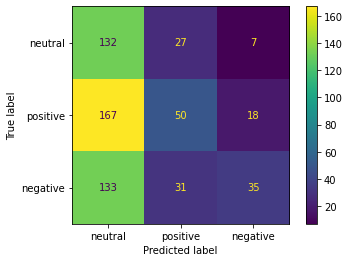

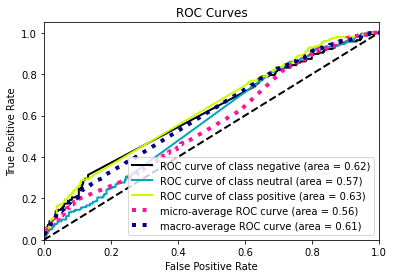


========== Decision Tree ==========
Decision Tree Test Accuracy: 0.33
Accuracy score: 0.33
F1-score: 0.27425186718710687
Precision-score: 0.4298495155638013
Recall-score: 0.37011460790236755
ROC-AUC-score: 0.5517617782151809
[[144  20   2]
 [184  37  14]
 [162  20  17]]


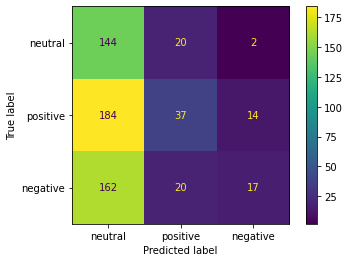

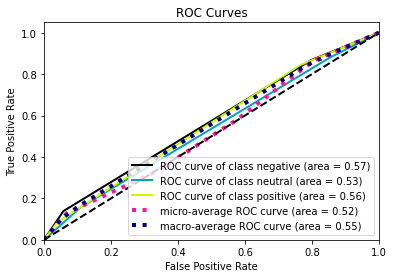


========== Random Forest ==========
Random Forest Test Accuracy: 0.33
Accuracy score: 0.33
F1-score: 0.27006095724183354
Precision-score: 0.46333260853808794
Recall-score: 0.3735757742828472
ROC-AUC-score: 0.5936635669160122
[[149  12   5]
 [194  30  11]
 [168  12  19]]


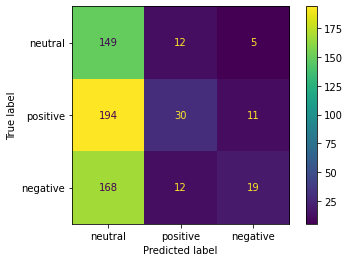

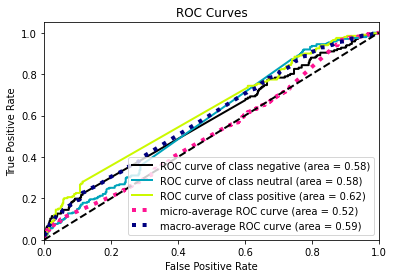


========== Support Vector Machine (SVM) ==========
Support Vector Machine (SVM) Test Accuracy: 0.36833333333333335
Accuracy score: 0.36833333333333335
F1-score: 0.3604681515330895
Precision-score: 0.4321611106325552
Recall-score: 0.39369903434973724
ROC-AUC-score: 0.6077859604782866
[[113  43  10]
 [152  55  28]
 [111  35  53]]


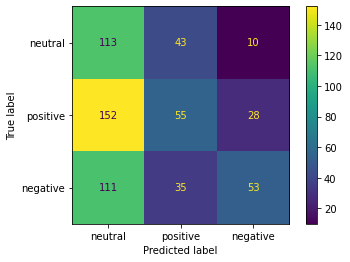

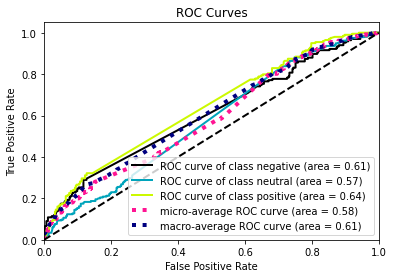


========== K-Nearest Neighbour (KNN) ==========
K-Nearest Neighbour (KNN) Test Accuracy: 0.3466666666666667
Accuracy score: 0.3466666666666667
F1-score: 0.2100728615864281
Precision-score: 0.4741525835275835
Recall-score: 0.34920002902661645
ROC-AUC-score: 0.5258573049817145
[[  7   2 157]
 [  5   6 224]
 [  1   3 195]]


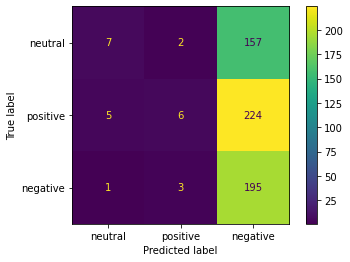

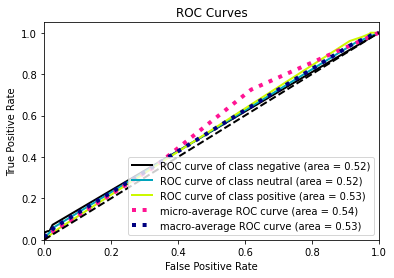


========== Multinomial Naive Bayes ==========
Multinomial Naive Bayes Test Accuracy: 0.365
Accuracy score: 0.365
F1-score: 0.35390908205895316
Precision-score: 0.4278096931816644
Recall-score: 0.3907583289428429
ROC-AUC-score: 0.6139030837344889
[[115  39  12]
 [153  56  26]
 [114  37  48]]


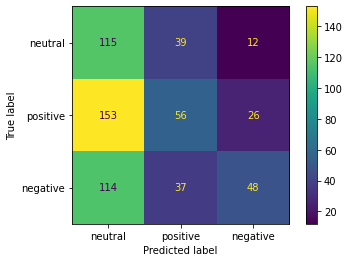

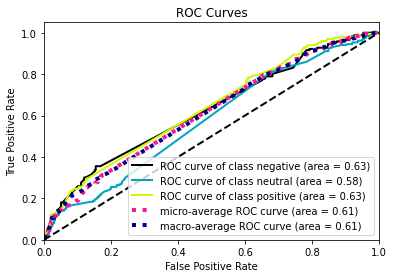

------------------------------------------
Best Accuracy Classifier: Support Vector Machine (SVM)


In [16]:
#@title Bag of Words (Bigram)
#Vectorizing -> Balancing -> Training
sentiment_pipeline_lr = Pipeline([('cv', CountVectorizer(ngram_range=(2,2))),
                              ('smote', SMOTE(random_state=42)),
                              ('lr_model', LogisticRegression())])

sentiment_pipeline_dt = Pipeline([('cv', CountVectorizer(ngram_range=(2,2))),
                              ('smote', SMOTE(random_state=42)),
                              ('dt_model', DecisionTreeClassifier())])

sentiment_pipeline_rf = Pipeline([('cv', CountVectorizer(ngram_range=(2,2))),
                              ('smote', SMOTE(random_state=42)),
                              ('rf_model', RandomForestClassifier())])

sentiment_pipeline_svm = Pipeline([('cv', CountVectorizer(ngram_range=(2,2))),
                               ('smote', SMOTE(random_state=42)),
                               ('svm_model', CalibratedClassifierCV(SGDClassifier()))])

sentiment_pipeline_knn = Pipeline([('cv', CountVectorizer(ngram_range=(2,2))),
                               ('smote', SMOTE(random_state=42)),
                               ('knn_model', KNeighborsClassifier())])

sentiment_pipeline_mnb = Pipeline([('cv', CountVectorizer(ngram_range=(2,2))),
                               ('smote', SMOTE(random_state=42)),
                               ('mnb_model', MultinomialNB())])

#List of Pipelines
pipelines = [sentiment_pipeline_lr, sentiment_pipeline_dt, sentiment_pipeline_rf, sentiment_pipeline_svm, sentiment_pipeline_knn, sentiment_pipeline_mnb]

#Dictionary of Pipelines
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Random Forest', 3: 'Support Vector Machine (SVM)', 4: 'K-Nearest Neighbour (KNN)', 5: 'Multinomial Naive Bayes'}

start = datetime.now()

#Fit the Pipelines
for pipe in pipelines:
    pipe.fit(X_sentiment_train, y_sentiment_train)
    
stop = datetime.now()
execution_time = stop-start
print("Execution time:", execution_time)

class_names = ['neutral', 'positive', 'negative']

for i, model in enumerate(pipelines):
    sentiment_y_predict_test = model.predict(X_sentiment_test)
    sentiment_y_predict_proba = model.predict_proba(X_sentiment_test)
    print("\n========== {} ==========".format(pipe_dict[i]))
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_sentiment_test,y_sentiment_test)))
    print('Accuracy score:',accuracy_score(y_sentiment_test, sentiment_y_predict_test))
    print('F1-score:',f1_score(y_sentiment_test, sentiment_y_predict_test, average='macro'))
    print('Precision-score:',precision_score(y_sentiment_test, sentiment_y_predict_test, average='macro'))
    print('Recall-score:',recall_score(y_sentiment_test, sentiment_y_predict_test, average='macro'))
    print('ROC-AUC-score:',roc_auc_score(y_sentiment_test, sentiment_y_predict_proba, average='macro', multi_class='ovo'))
    print(confusion_matrix(y_sentiment_test, sentiment_y_predict_test)) 
    
    (ConfusionMatrixDisplay((metrics.confusion_matrix(y_sentiment_test, sentiment_y_predict_test)),display_labels=class_names)).plot()
    skplt.metrics.plot_roc(y_sentiment_test, sentiment_y_predict_proba)
    plt.show()

#Best Accuracy Model    
best_accuracy = 0.0
best_classifier = 0
best_pipeline = ""

print('------------------------------------------')
for i, model in enumerate(pipelines):
    if model.score(X_sentiment_test,y_sentiment_test)>best_accuracy:
        best_accuracy=model.score(X_sentiment_test,y_sentiment_test)
        best_pipeline=model
        best_classifier=i
print('Best Accuracy Classifier: {}'.format(pipe_dict[best_classifier]))

___

Execution time: 0:00:03.458874

========== Logistic Regression ==========
Logistic Regression Test Accuracy: 0.605
Accuracy score: 0.605
F1-score: 0.6035763611545691
Precision-score: 0.6040144345541596
Recall-score: 0.6037010224153322
ROC-AUC-score: 0.7792506066176391
[[ 91  53  22]
 [ 50 135  50]
 [ 16  46 137]]


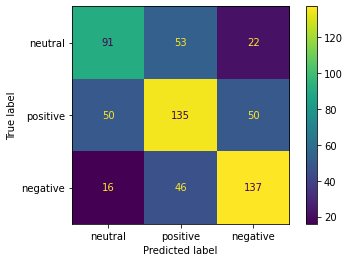

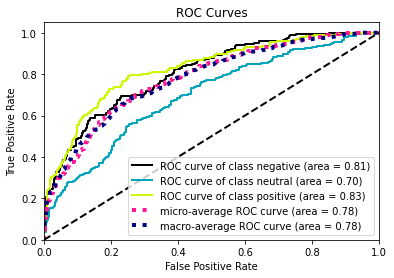


========== Decision Tree ==========
Decision Tree Test Accuracy: 0.5833333333333334
Accuracy score: 0.5833333333333334
F1-score: 0.5791846390908101
Precision-score: 0.5875631313131313
Recall-score: 0.5767934348320257
ROC-AUC-score: 0.6825950761240193
[[ 91  56  19]
 [ 38 155  42]
 [ 31  64 104]]


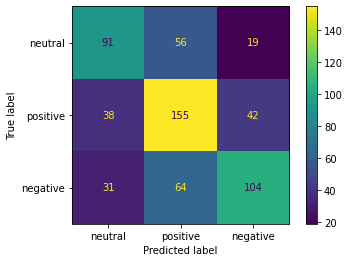

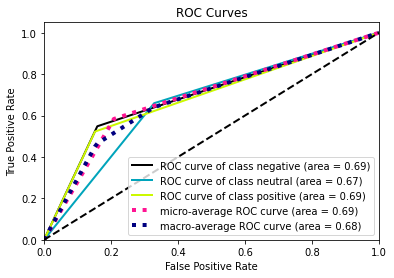


========== Random Forest ==========
Random Forest Test Accuracy: 0.59
Accuracy score: 0.59
F1-score: 0.5831889846438162
Precision-score: 0.6390187650350252
Recall-score: 0.5740052479779054
ROC-AUC-score: 0.7814362872209463
[[ 81  79   6]
 [ 33 179  23]
 [ 12  93  94]]


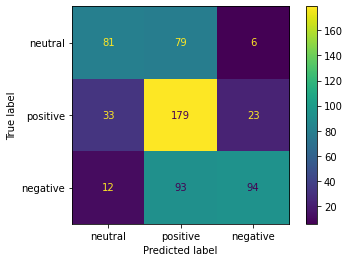

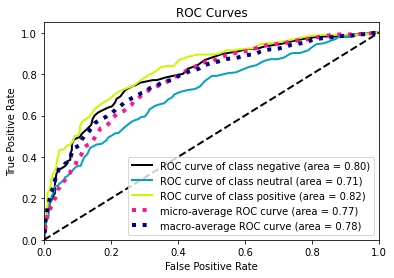


========== Support Vector Machine (SVM) ==========
Support Vector Machine (SVM) Test Accuracy: 0.6133333333333333
Accuracy score: 0.6133333333333333
F1-score: 0.6106983540993693
Precision-score: 0.6319163292847504
Recall-score: 0.6034340720091957
ROC-AUC-score: 0.7909077988421128
[[ 82  66  18]
 [ 30 157  48]
 [  8  62 129]]


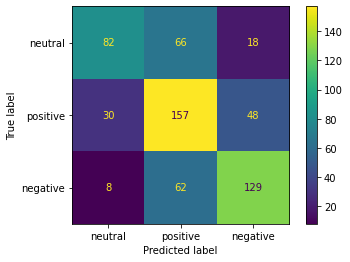

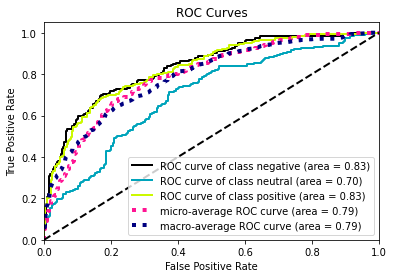


========== K-Nearest Neighbour (KNN) ==========
K-Nearest Neighbour (KNN) Test Accuracy: 0.4116666666666667
Accuracy score: 0.4116666666666667
F1-score: 0.268209443042194
Precision-score: 0.5510587977726501
Recall-score: 0.36043255669958785
ROC-AUC-score: 0.5183545257690658
[[ 11 154   1]
 [ 10 222   3]
 [  2 183  14]]


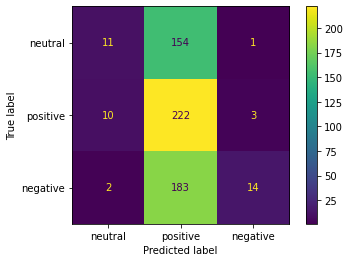

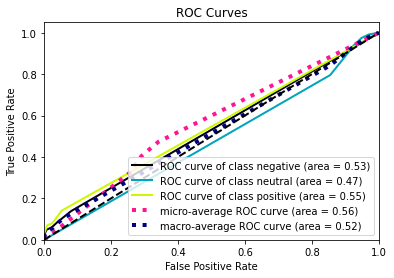


========== Multinomial Naive Bayes ==========
Multinomial Naive Bayes Test Accuracy: 0.56
Accuracy score: 0.56
F1-score: 0.5594478838337016
Precision-score: 0.561000525953797
Recall-score: 0.570785869877457
ROC-AUC-score: 0.7678770894547934
[[101  42  23]
 [ 83 100  52]
 [ 30  34 135]]


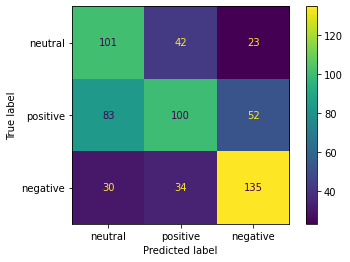

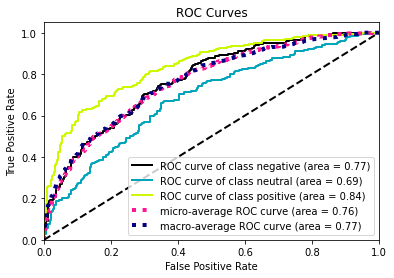

------------------------------------------
Best Accuracy Classifier: Support Vector Machine (SVM)


In [17]:
#@title TF-IDF (Unigram)
#Vectorizing -> Balancing -> Training
sentiment_pipeline_lr = Pipeline([('cv', TfidfVectorizer(ngram_range=(1,1))),
                              ('smote', SMOTE(random_state=42)),
                              ('lr_model', LogisticRegression())])

sentiment_pipeline_dt = Pipeline([('cv', TfidfVectorizer(ngram_range=(1,1))),
                              ('smote', SMOTE(random_state=42)),
                              ('dt_model', DecisionTreeClassifier())])

sentiment_pipeline_rf = Pipeline([('cv', TfidfVectorizer(ngram_range=(1,1))),
                              ('smote', SMOTE(random_state=42)),
                              ('rf_model', RandomForestClassifier())])

sentiment_pipeline_svm = Pipeline([('cv', TfidfVectorizer(ngram_range=(1,1))),
                               ('smote', SMOTE(random_state=42)),
                               ('svm_model', CalibratedClassifierCV(SGDClassifier()))])

sentiment_pipeline_knn = Pipeline([('cv', TfidfVectorizer(ngram_range=(1,1))),
                               ('smote', SMOTE(random_state=42)),
                               ('knn_model', KNeighborsClassifier())])

sentiment_pipeline_mnb = Pipeline([('cv', TfidfVectorizer(ngram_range=(1,1))),
                               ('smote', SMOTE(random_state=42)),
                               ('mnb_model', MultinomialNB())])

#List of Pipelines
pipelines = [sentiment_pipeline_lr, sentiment_pipeline_dt, sentiment_pipeline_rf, sentiment_pipeline_svm, sentiment_pipeline_knn, sentiment_pipeline_mnb]

#Dictionary of Pipelines
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Random Forest', 3: 'Support Vector Machine (SVM)', 4: 'K-Nearest Neighbour (KNN)', 5: 'Multinomial Naive Bayes'}

start = datetime.now()

#Fit the Pipelines
for pipe in pipelines:
    pipe.fit(X_sentiment_train, y_sentiment_train)
    
stop = datetime.now()
execution_time = stop-start
print("Execution time:", execution_time)

class_names = ['neutral', 'positive', 'negative']

for i, model in enumerate(pipelines):
    sentiment_y_predict_test = model.predict(X_sentiment_test)
    sentiment_y_predict_proba = model.predict_proba(X_sentiment_test)
    print("\n========== {} ==========".format(pipe_dict[i]))
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_sentiment_test,y_sentiment_test)))
    print('Accuracy score:',accuracy_score(y_sentiment_test, sentiment_y_predict_test))
    print('F1-score:',f1_score(y_sentiment_test, sentiment_y_predict_test, average='macro'))
    print('Precision-score:',precision_score(y_sentiment_test, sentiment_y_predict_test, average='macro'))
    print('Recall-score:',recall_score(y_sentiment_test, sentiment_y_predict_test, average='macro'))
    print('ROC-AUC-score:',roc_auc_score(y_sentiment_test, sentiment_y_predict_proba, average='macro', multi_class='ovo'))
    print(confusion_matrix(y_sentiment_test, sentiment_y_predict_test)) 
    
    (ConfusionMatrixDisplay((metrics.confusion_matrix(y_sentiment_test, sentiment_y_predict_test)),display_labels=class_names)).plot()
    skplt.metrics.plot_roc(y_sentiment_test, sentiment_y_predict_proba)
    plt.show()

#Best Accuracy Model    
best_accuracy = 0.0
best_classifier = 0
best_pipeline = ""

print('------------------------------------------')
for i, model in enumerate(pipelines):
    if model.score(X_sentiment_test,y_sentiment_test)>best_accuracy:
        best_accuracy=model.score(X_sentiment_test,y_sentiment_test)
        best_pipeline=model
        best_classifier=i
print('Best Accuracy Classifier: {}'.format(pipe_dict[best_classifier]))

___

Execution time: 0:00:08.385371

========== Logistic Regression ==========
Logistic Regression Test Accuracy: 0.41833333333333333
Accuracy score: 0.41833333333333333
F1-score: 0.3942434377216986
Precision-score: 0.44042404511078054
Recall-score: 0.4200239426647035
ROC-AUC-score: 0.6110464739316509
[[ 45  38  83]
 [ 31  60 144]
 [ 18  35 146]]


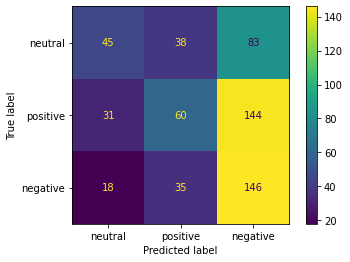

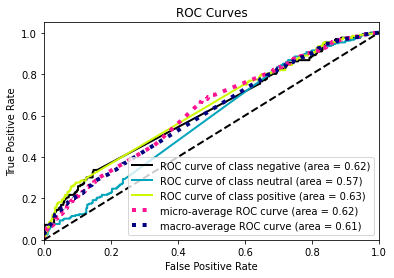


========== Decision Tree ==========
Decision Tree Test Accuracy: 0.4166666666666667
Accuracy score: 0.4166666666666667
F1-score: 0.309718424559738
Precision-score: 0.4886614973837384
Recall-score: 0.3720470248362207
ROC-AUC-score: 0.5578377339143809
[[ 20 143   3]
 [ 14 208  13]
 [  7 170  22]]


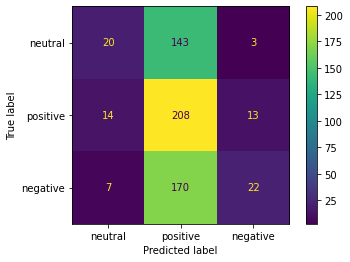

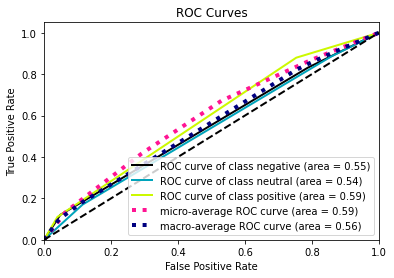


========== Random Forest ==========
Random Forest Test Accuracy: 0.4166666666666667
Accuracy score: 0.4166666666666667
F1-score: 0.28637245832653135
Precision-score: 0.5297177709750689
Recall-score: 0.3668170812191351
ROC-AUC-score: 0.58783950084525
[[ 12 152   2]
 [  8 218   9]
 [  2 177  20]]


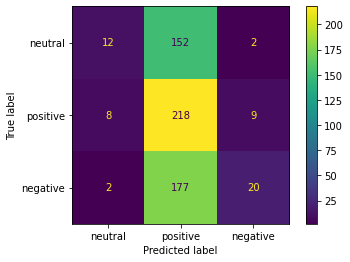

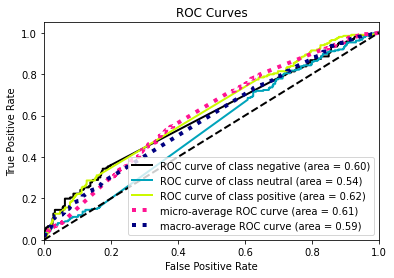


========== Support Vector Machine (SVM) ==========
Support Vector Machine (SVM) Test Accuracy: 0.45166666666666666
Accuracy score: 0.45166666666666666
F1-score: 0.4090087753637372
Precision-score: 0.4824854662094069
Recall-score: 0.4228363469917304
ROC-AUC-score: 0.608130909181471
[[ 43 110  13]
 [ 33 177  25]
 [ 20 128  51]]


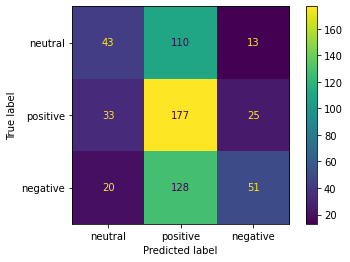

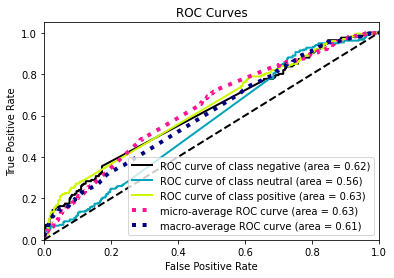


========== K-Nearest Neighbour (KNN) ==========
K-Nearest Neighbour (KNN) Test Accuracy: 0.3933333333333333
Accuracy score: 0.3933333333333333
F1-score: 0.24779040404040406
Precision-score: 0.44676014308499257
Recall-score: 0.343546709021481
ROC-AUC-score: 0.5511315549807484
[[ 11 154   1]
 [ 12 216   7]
 [  3 187   9]]


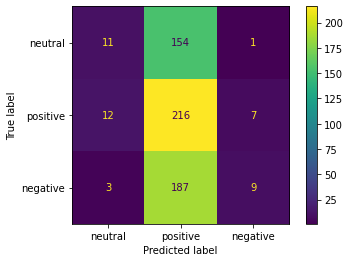

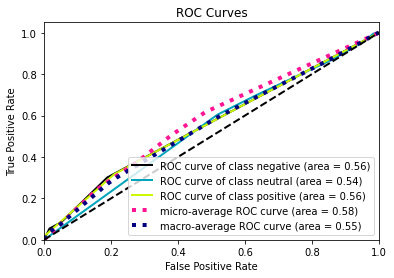


========== Multinomial Naive Bayes ==========
Multinomial Naive Bayes Test Accuracy: 0.385
Accuracy score: 0.385
F1-score: 0.37482504074393636
Precision-score: 0.4561162563576537
Recall-score: 0.41175397623853693
ROC-AUC-score: 0.6103197779893229
[[120  35  11]
 [153  59  23]
 [110  37  52]]


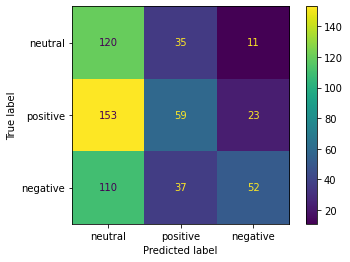

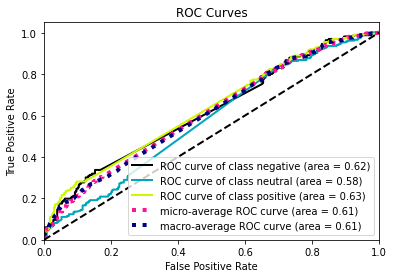

------------------------------------------
Best Accuracy Classifier: Support Vector Machine (SVM)


In [18]:
#@title TF-IDF (Bigram)
#Vectorizing -> Balancing -> Training
sentiment_pipeline_lr = Pipeline([('cv', TfidfVectorizer(ngram_range=(2,2))),
                              ('smote', SMOTE(random_state=42)),
                              ('lr_model', LogisticRegression())])

sentiment_pipeline_dt = Pipeline([('cv', TfidfVectorizer(ngram_range=(2,2))),
                              ('smote', SMOTE(random_state=42)),
                              ('dt_model', DecisionTreeClassifier())])

sentiment_pipeline_rf = Pipeline([('cv', TfidfVectorizer(ngram_range=(2,2))),
                              ('smote', SMOTE(random_state=42)),
                              ('rf_model', RandomForestClassifier())])

sentiment_pipeline_svm = Pipeline([('cv', TfidfVectorizer(ngram_range=(2,2))),
                               ('smote', SMOTE(random_state=42)),
                               ('svm_model', CalibratedClassifierCV(SGDClassifier()))])

sentiment_pipeline_knn = Pipeline([('cv', TfidfVectorizer(ngram_range=(2,2))),
                               ('smote', SMOTE(random_state=42)),
                               ('knn_model', KNeighborsClassifier())])

sentiment_pipeline_mnb = Pipeline([('cv', TfidfVectorizer(ngram_range=(2,2))),
                               ('smote', SMOTE(random_state=42)),
                               ('mnb_model', MultinomialNB())])

#List of Pipelines
pipelines = [sentiment_pipeline_lr, sentiment_pipeline_dt, sentiment_pipeline_rf, sentiment_pipeline_svm, sentiment_pipeline_knn, sentiment_pipeline_mnb]

#Dictionary of Pipelines
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Random Forest', 3: 'Support Vector Machine (SVM)', 4: 'K-Nearest Neighbour (KNN)', 5: 'Multinomial Naive Bayes'}

start = datetime.now()

#Fit the Pipelines
for pipe in pipelines:
    pipe.fit(X_sentiment_train, y_sentiment_train)
    
stop = datetime.now()
execution_time = stop-start
print("Execution time:", execution_time)

class_names = ['neutral', 'positive', 'negative']

for i, model in enumerate(pipelines):
    sentiment_y_predict_test = model.predict(X_sentiment_test)
    sentiment_y_predict_proba = model.predict_proba(X_sentiment_test)
    print("\n========== {} ==========".format(pipe_dict[i]))
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_sentiment_test,y_sentiment_test)))
    print('Accuracy score:',accuracy_score(y_sentiment_test, sentiment_y_predict_test))
    print('F1-score:',f1_score(y_sentiment_test, sentiment_y_predict_test, average='macro'))
    print('Precision-score:',precision_score(y_sentiment_test, sentiment_y_predict_test, average='macro'))
    print('Recall-score:',recall_score(y_sentiment_test, sentiment_y_predict_test, average='macro'))
    print('ROC-AUC-score:',roc_auc_score(y_sentiment_test, sentiment_y_predict_proba, average='macro', multi_class='ovo'))
    print(confusion_matrix(y_sentiment_test, sentiment_y_predict_test)) 
    
    (ConfusionMatrixDisplay((metrics.confusion_matrix(y_sentiment_test, sentiment_y_predict_test)),display_labels=class_names)).plot()
    skplt.metrics.plot_roc(y_sentiment_test, sentiment_y_predict_proba)
    plt.show()

#Best Accuracy Model    
best_accuracy = 0.0
best_classifier = 0
best_pipeline = ""

print('------------------------------------------')
for i, model in enumerate(pipelines):
    if model.score(X_sentiment_test,y_sentiment_test)>best_accuracy:
        best_accuracy=model.score(X_sentiment_test,y_sentiment_test)
        best_pipeline=model
        best_classifier=i
print('Best Accuracy Classifier: {}'.format(pipe_dict[best_classifier]))

___

In [19]:
#@title Hyperparameter Tuning (GridSearchCV)
#TF-IDF (Unigram) - Support Vector Machine (SVM)
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

sentiment_pipeline_svm = Pipeline([('cv', TfidfVectorizer(ngram_range=(1,1))),
                               ('smote', SMOTE(random_state=42)),
                               ('svm_model', SGDClassifier())])

param_grid = {'svm_model__alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],
              'svm_model__max_iter':[5, 50, 100, 1000],
              'svm_model__loss': ['log'],
              'svm_model__penalty': ['l2'],
              'svm_model__n_jobs': [-1]}

start = datetime.now()

grid_search = GridSearchCV(sentiment_pipeline_svm, param_grid, refit = True, verbose = 3)
sentiment_best_model = grid_search.fit(X_sentiment_train, y_sentiment_train)

stop = datetime.now()
execution_time = stop-start 
print("Execution time:", execution_time)

print("Best score:", grid_search.best_score_)
print("Best params:", grid_search.best_params_)
print(sentiment_best_model.best_estimator_)
print("The mean accuracy of the model is:",sentiment_best_model.score(X_sentiment_test,y_sentiment_test))
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END svm_model__alpha=0.0001, svm_model__loss=log, svm_model__max_iter=5, svm_model__n_jobs=-1, svm_model__penalty=l2;, score=0.610 total time=   0.1s
[CV 2/5] END svm_model__alpha=0.0001, svm_model__loss=log, svm_model__max_iter=5, svm_model__n_jobs=-1, svm_model__penalty=l2;, score=0.598 total time=   0.1s
[CV 3/5] END svm_model__alpha=0.0001, svm_model__loss=log, svm_model__max_iter=5, svm_model__n_jobs=-1, svm_model__penalty=l2;, score=0.588 total time=   0.1s
[CV 4/5] END svm_model__alpha=0.0001, svm_model__loss=log, svm_model__max_iter=5, svm_model__n_jobs=-1, svm_model__penalty=l2;, score=0.573 total time=   0.1s
[CV 5/5] END svm_model__alpha=0.0001, svm_model__loss=log, svm_model__max_iter=5, svm_model__n_jobs=-1, svm_model__penalty=l2;, score=0.598 total time=   0.1s
[CV 1/5] END svm_model__alpha=0.0001, svm_model__loss=log, svm_model__max_iter=50, svm_model__n_jobs=-1, svm_model__penalty=l2;, score=0.610 to

___

Execution time: 0:00:00.232333

========== Support Vector Machine (SVM) ==========
Support Vector Machine (SVM) Test Accuracy: 0.6133333333333333
Accuracy score: 0.6133333333333333
F1-score: 0.6130831016373185
Precision-score: 0.6204726613251653
Recall-score: 0.6087404037190138
ROC-AUC-score: 0.787879090402023
[[ 91  57  18]
 [ 43 148  44]
 [ 12  58 129]]


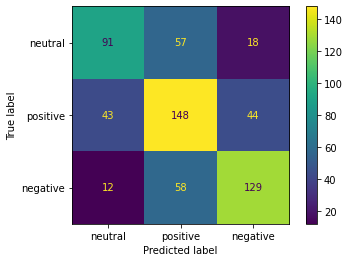

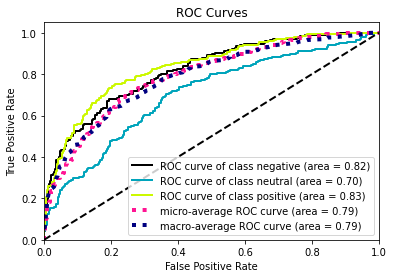

------------------------------------------
Best Accuracy Classifier: Support Vector Machine (SVM)


In [20]:
#@title Save Best Model (Sentiment - TFIDF - Unigram - SVM)
sentiment_pipeline_svm = Pipeline([('cv', TfidfVectorizer(ngram_range=(1,1))),
                                   ('smote', SMOTE(random_state=42)),
                                   ('svm_model', CalibratedClassifierCV(SGDClassifier(loss='log', max_iter=100, n_jobs=-1)))])

#List of Pipelines
pipelines = [sentiment_pipeline_svm]

#Dictionary of Pipelines
pipe_dict = {0: 'Support Vector Machine (SVM)'}

start = datetime.now()

#Fit the Pipelines
for pipe in pipelines:
    pipe.fit(X_sentiment_train, y_sentiment_train)
    
stop = datetime.now()
execution_time = stop-start
print("Execution time:", execution_time)

class_names = ['neutral', 'positive', 'negative']

for i, model in enumerate(pipelines):
    sentiment_y_predict_test = model.predict(X_sentiment_test)
    sentiment_y_predict_proba = model.predict_proba(X_sentiment_test)
    print("\n========== {} ==========".format(pipe_dict[i]))
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_sentiment_test,y_sentiment_test)))
    print('Accuracy score:',accuracy_score(y_sentiment_test, sentiment_y_predict_test))
    print('F1-score:',f1_score(y_sentiment_test, sentiment_y_predict_test, average='macro'))
    print('Precision-score:',precision_score(y_sentiment_test, sentiment_y_predict_test, average='macro'))
    print('Recall-score:',recall_score(y_sentiment_test, sentiment_y_predict_test, average='macro'))
    print('ROC-AUC-score:',roc_auc_score(y_sentiment_test, sentiment_y_predict_proba, average='macro', multi_class='ovo'))
    print(confusion_matrix(y_sentiment_test, sentiment_y_predict_test)) 
    
    (ConfusionMatrixDisplay((metrics.confusion_matrix(y_sentiment_test, sentiment_y_predict_test)),display_labels=class_names)).plot()
    skplt.metrics.plot_roc(y_sentiment_test, sentiment_y_predict_proba)
    plt.show()

#Best Accuracy Model    
best_accuracy = 0.0
best_classifier = 0
best_pipeline = ""

print('------------------------------------------')
for i, model in enumerate(pipelines):
    if model.score(X_sentiment_test,y_sentiment_test)>best_accuracy:
        best_accuracy=model.score(X_sentiment_test,y_sentiment_test)
        best_pipeline=model
        best_classifier=i
print('Best Accuracy Classifier: {}'.format(pipe_dict[best_classifier]))

model_file = open("english_sentiment_svm.pkl","wb")
joblib.dump(sentiment_pipeline_svm,model_file)
model_file.close()

___

# Emotion (Multilabel)

In [21]:
#@title Bag of Words (Unigram)
#Vectorizing -> Balancing -> Training
#https://github.com/nkartik94/Multi-Label-Text-Classification/blob/master/Mark_6.ipynb
emotion_pipeline_lr = Pipeline([('cv', CountVectorizer(ngram_range=(1,1))),
                                ('smote', SMOTE(random_state=42)),
                                ('lr_model', LogisticRegression())])

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

for label in emotion:
  print('\n..........Processing Tweets of {} Emotion..........'.format(label))
  emotion_pipeline_lr.fit(X_emotion_train, train[label])

  y_pred_X = emotion_pipeline_lr.predict(X_emotion_test)
  print('Accuracy score:',accuracy_score(test[label], y_pred_X))


..........Processing Tweets of anger Emotion..........
Accuracy score: 0.6721311475409836

..........Processing Tweets of anticipation Emotion..........
Accuracy score: 0.73224043715847

..........Processing Tweets of disgust Emotion..........
Accuracy score: 0.7240437158469946

..........Processing Tweets of fear Emotion..........
Accuracy score: 0.6939890710382514

..........Processing Tweets of joy Emotion..........
Accuracy score: 0.6584699453551912

..........Processing Tweets of sadness Emotion..........
Accuracy score: 0.6721311475409836

..........Processing Tweets of surprise Emotion..........
Accuracy score: 0.6830601092896175

..........Processing Tweets of trust Emotion..........
Accuracy score: 0.7131147540983607


In [22]:
emotion_pipeline_dt = Pipeline([('cv', CountVectorizer(ngram_range=(1,1))),
                                ('smote', SMOTE(random_state=42)),
                                ('dt_model', DecisionTreeClassifier())])

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

for label in emotion:
  print('\n..........Processing Tweets of {} Emotion..........'.format(label))
  emotion_pipeline_dt.fit(X_emotion_train, train[label])

  y_pred_X = emotion_pipeline_dt.predict(X_emotion_test)
  print('Accuracy score:',accuracy_score(test[label], y_pred_X))


..........Processing Tweets of anger Emotion..........
Accuracy score: 0.6065573770491803

..........Processing Tweets of anticipation Emotion..........
Accuracy score: 0.6857923497267759

..........Processing Tweets of disgust Emotion..........
Accuracy score: 0.6475409836065574

..........Processing Tweets of fear Emotion..........
Accuracy score: 0.6366120218579235

..........Processing Tweets of joy Emotion..........
Accuracy score: 0.6229508196721312

..........Processing Tweets of sadness Emotion..........
Accuracy score: 0.6147540983606558

..........Processing Tweets of surprise Emotion..........
Accuracy score: 0.6693989071038251

..........Processing Tweets of trust Emotion..........
Accuracy score: 0.6885245901639344


In [23]:
emotion_pipeline_rf = Pipeline([('cv', CountVectorizer(ngram_range=(1,1))),
                                ('smote', SMOTE(random_state=42)),
                                ('rf_model', RandomForestClassifier())])

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

for label in emotion:
  print('\n..........Processing Tweets of {} Emotion..........'.format(label))
  emotion_pipeline_rf.fit(X_emotion_train, train[label])

  y_pred_X = emotion_pipeline_rf.predict(X_emotion_test)
  print('Accuracy score:',accuracy_score(test[label], y_pred_X))


..........Processing Tweets of anger Emotion..........
Accuracy score: 0.6420765027322405

..........Processing Tweets of anticipation Emotion..........
Accuracy score: 0.7213114754098361

..........Processing Tweets of disgust Emotion..........
Accuracy score: 0.6994535519125683

..........Processing Tweets of fear Emotion..........
Accuracy score: 0.6912568306010929

..........Processing Tweets of joy Emotion..........
Accuracy score: 0.6502732240437158

..........Processing Tweets of sadness Emotion..........
Accuracy score: 0.639344262295082

..........Processing Tweets of surprise Emotion..........
Accuracy score: 0.6475409836065574

..........Processing Tweets of trust Emotion..........
Accuracy score: 0.7131147540983607


In [24]:
emotion_pipeline_svm = Pipeline([('cv', CountVectorizer(ngram_range=(1,1))),
                                 ('smote', SMOTE(random_state=42)),
                                 ('svm_model', CalibratedClassifierCV(SGDClassifier()))])

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

for label in emotion:
  print('\n..........Processing Tweets of {} Emotion..........'.format(label))
  emotion_pipeline_svm.fit(X_emotion_train, train[label])

  y_pred_X = emotion_pipeline_svm.predict(X_emotion_test)
  print('Accuracy score:',accuracy_score(test[label], y_pred_X))


..........Processing Tweets of anger Emotion..........
Accuracy score: 0.6885245901639344

..........Processing Tweets of anticipation Emotion..........
Accuracy score: 0.7185792349726776

..........Processing Tweets of disgust Emotion..........
Accuracy score: 0.773224043715847

..........Processing Tweets of fear Emotion..........
Accuracy score: 0.7513661202185792

..........Processing Tweets of joy Emotion..........
Accuracy score: 0.6612021857923497

..........Processing Tweets of sadness Emotion..........
Accuracy score: 0.674863387978142

..........Processing Tweets of surprise Emotion..........
Accuracy score: 0.7486338797814208

..........Processing Tweets of trust Emotion..........
Accuracy score: 0.6939890710382514


In [25]:
emotion_pipeline_knn = Pipeline([('cv', CountVectorizer(ngram_range=(1,1))),
                                 ('smote', SMOTE(random_state=42)),
                                 ('knn_model', KNeighborsClassifier())])

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

for label in emotion:
  print('\n..........Processing Tweets of {} Emotion..........'.format(label))
  emotion_pipeline_knn.fit(X_emotion_train, train[label])

  y_pred_X = emotion_pipeline_knn.predict(X_emotion_test)
  print('Accuracy score:',accuracy_score(test[label], y_pred_X))


..........Processing Tweets of anger Emotion..........
Accuracy score: 0.3524590163934426

..........Processing Tweets of anticipation Emotion..........
Accuracy score: 0.4781420765027322

..........Processing Tweets of disgust Emotion..........
Accuracy score: 0.2786885245901639

..........Processing Tweets of fear Emotion..........
Accuracy score: 0.28415300546448086

..........Processing Tweets of joy Emotion..........
Accuracy score: 0.46994535519125685

..........Processing Tweets of sadness Emotion..........
Accuracy score: 0.3524590163934426

..........Processing Tweets of surprise Emotion..........
Accuracy score: 0.32786885245901637

..........Processing Tweets of trust Emotion..........
Accuracy score: 0.5191256830601093


In [26]:
emotion_pipeline_mnb = Pipeline([('cv', CountVectorizer(ngram_range=(1,1))),
                                 ('smote', SMOTE(random_state=42)),
                                 ('mnb_model', MultinomialNB())])

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

for label in emotion:
  print('\n..........Processing Tweets of {} Emotion..........'.format(label))
  emotion_pipeline_mnb.fit(X_emotion_train, train[label])

  y_pred_X = emotion_pipeline_mnb.predict(X_emotion_test)
  print('Accuracy score:',accuracy_score(test[label], y_pred_X))


..........Processing Tweets of anger Emotion..........
Accuracy score: 0.7459016393442623

..........Processing Tweets of anticipation Emotion..........
Accuracy score: 0.7213114754098361

..........Processing Tweets of disgust Emotion..........
Accuracy score: 0.8087431693989071

..........Processing Tweets of fear Emotion..........
Accuracy score: 0.7868852459016393

..........Processing Tweets of joy Emotion..........
Accuracy score: 0.6830601092896175

..........Processing Tweets of sadness Emotion..........
Accuracy score: 0.7622950819672131

..........Processing Tweets of surprise Emotion..........
Accuracy score: 0.7568306010928961

..........Processing Tweets of trust Emotion..........
Accuracy score: 0.6420765027322405


___

In [27]:
#@title Bag of Words (Bigram)
#Vectorizing -> Balancing -> Training
#https://github.com/nkartik94/Multi-Label-Text-Classification/blob/master/Mark_6.ipynb
emotion_pipeline_lr = Pipeline([('cv', CountVectorizer(ngram_range=(2,2))),
                                ('smote', SMOTE(random_state=42)),
                                ('lr_model', LogisticRegression())])

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

for label in emotion:
  print('\n..........Processing Tweets of {} Emotion..........'.format(label))
  emotion_pipeline_lr.fit(X_emotion_train, train[label])

  y_pred_X = emotion_pipeline_lr.predict(X_emotion_test)
  print('Accuracy score:',accuracy_score(test[label], y_pred_X))


..........Processing Tweets of anger Emotion..........
Accuracy score: 0.3907103825136612

..........Processing Tweets of anticipation Emotion..........
Accuracy score: 0.5628415300546448

..........Processing Tweets of disgust Emotion..........
Accuracy score: 0.36065573770491804

..........Processing Tweets of fear Emotion..........
Accuracy score: 0.3114754098360656

..........Processing Tweets of joy Emotion..........
Accuracy score: 0.5327868852459017

..........Processing Tweets of sadness Emotion..........
Accuracy score: 0.4180327868852459

..........Processing Tweets of surprise Emotion..........
Accuracy score: 0.4180327868852459

..........Processing Tweets of trust Emotion..........
Accuracy score: 0.5573770491803278


In [28]:
emotion_pipeline_dt = Pipeline([('cv', CountVectorizer(ngram_range=(2,2))),
                                ('smote', SMOTE(random_state=42)),
                                ('dt_model', DecisionTreeClassifier())])

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

for label in emotion:
  print('\n..........Processing Tweets of {} Emotion..........'.format(label))
  emotion_pipeline_dt.fit(X_emotion_train, train[label])

  y_pred_X = emotion_pipeline_dt.predict(X_emotion_test)
  print('Accuracy score:',accuracy_score(test[label], y_pred_X))


..........Processing Tweets of anger Emotion..........
Accuracy score: 0.4262295081967213

..........Processing Tweets of anticipation Emotion..........
Accuracy score: 0.5327868852459017

..........Processing Tweets of disgust Emotion..........
Accuracy score: 0.3879781420765027

..........Processing Tweets of fear Emotion..........
Accuracy score: 0.3469945355191257

..........Processing Tweets of joy Emotion..........
Accuracy score: 0.5109289617486339

..........Processing Tweets of sadness Emotion..........
Accuracy score: 0.41530054644808745

..........Processing Tweets of surprise Emotion..........
Accuracy score: 0.3907103825136612

..........Processing Tweets of trust Emotion..........
Accuracy score: 0.5573770491803278


In [29]:
emotion_pipeline_rf = Pipeline([('cv', CountVectorizer(ngram_range=(2,2))),
                                ('smote', SMOTE(random_state=42)),
                                ('rf_model', RandomForestClassifier())])

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

for label in emotion:
  print('\n..........Processing Tweets of {} Emotion..........'.format(label))
  emotion_pipeline_rf.fit(X_emotion_train, train[label])

  y_pred_X = emotion_pipeline_rf.predict(X_emotion_test)
  print('Accuracy score:',accuracy_score(test[label], y_pred_X))


..........Processing Tweets of anger Emotion..........
Accuracy score: 0.3797814207650273

..........Processing Tweets of anticipation Emotion..........
Accuracy score: 0.5163934426229508

..........Processing Tweets of disgust Emotion..........
Accuracy score: 0.3551912568306011

..........Processing Tweets of fear Emotion..........
Accuracy score: 0.30601092896174864

..........Processing Tweets of joy Emotion..........
Accuracy score: 0.4808743169398907

..........Processing Tweets of sadness Emotion..........
Accuracy score: 0.3907103825136612

..........Processing Tweets of surprise Emotion..........
Accuracy score: 0.3770491803278688

..........Processing Tweets of trust Emotion..........
Accuracy score: 0.546448087431694


In [30]:
emotion_pipeline_svm = Pipeline([('cv', CountVectorizer(ngram_range=(2,2))),
                                 ('smote', SMOTE(random_state=42)),
                                 ('svm_model', CalibratedClassifierCV(SGDClassifier()))])

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

for label in emotion:
  print('\n..........Processing Tweets of {} Emotion..........'.format(label))
  emotion_pipeline_svm.fit(X_emotion_train, train[label])

  y_pred_X = emotion_pipeline_svm.predict(X_emotion_test)
  print('Accuracy score:',accuracy_score(test[label], y_pred_X))


..........Processing Tweets of anger Emotion..........
Accuracy score: 0.505464480874317

..........Processing Tweets of anticipation Emotion..........
Accuracy score: 0.5792349726775956

..........Processing Tweets of disgust Emotion..........
Accuracy score: 0.5109289617486339

..........Processing Tweets of fear Emotion..........
Accuracy score: 0.4726775956284153

..........Processing Tweets of joy Emotion..........
Accuracy score: 0.5683060109289617

..........Processing Tweets of sadness Emotion..........
Accuracy score: 0.5

..........Processing Tweets of surprise Emotion..........
Accuracy score: 0.5109289617486339

..........Processing Tweets of trust Emotion..........
Accuracy score: 0.5601092896174863


In [31]:
emotion_pipeline_knn = Pipeline([('cv', CountVectorizer(ngram_range=(2,2))),
                                 ('smote', SMOTE(random_state=42)),
                                 ('knn_model', KNeighborsClassifier())])

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

for label in emotion:
  print('\n..........Processing Tweets of {} Emotion..........'.format(label))
  emotion_pipeline_knn.fit(X_emotion_train, train[label])

  y_pred_X = emotion_pipeline_knn.predict(X_emotion_test)
  print('Accuracy score:',accuracy_score(test[label], y_pred_X))


..........Processing Tweets of anger Emotion..........
Accuracy score: 0.31693989071038253

..........Processing Tweets of anticipation Emotion..........
Accuracy score: 0.4644808743169399

..........Processing Tweets of disgust Emotion..........
Accuracy score: 0.23770491803278687

..........Processing Tweets of fear Emotion..........
Accuracy score: 0.27595628415300544

..........Processing Tweets of joy Emotion..........
Accuracy score: 0.4562841530054645

..........Processing Tweets of sadness Emotion..........
Accuracy score: 0.3333333333333333

..........Processing Tweets of surprise Emotion..........
Accuracy score: 0.3114754098360656

..........Processing Tweets of trust Emotion..........
Accuracy score: 0.49453551912568305


In [32]:
emotion_pipeline_mnb = Pipeline([('cv', CountVectorizer(ngram_range=(2,2))),
                                 ('smote', SMOTE(random_state=42)),
                                 ('mnb_model', MultinomialNB())])

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

for label in emotion:
  print('\n..........Processing Tweets of {} Emotion..........'.format(label))
  emotion_pipeline_mnb.fit(X_emotion_train, train[label])

  y_pred_X = emotion_pipeline_mnb.predict(X_emotion_test)
  print('Accuracy score:',accuracy_score(test[label], y_pred_X))


..........Processing Tweets of anger Emotion..........
Accuracy score: 0.6994535519125683

..........Processing Tweets of anticipation Emotion..........
Accuracy score: 0.5983606557377049

..........Processing Tweets of disgust Emotion..........
Accuracy score: 0.7404371584699454

..........Processing Tweets of fear Emotion..........
Accuracy score: 0.46994535519125685

..........Processing Tweets of joy Emotion..........
Accuracy score: 0.592896174863388

..........Processing Tweets of sadness Emotion..........
Accuracy score: 0.6939890710382514

..........Processing Tweets of surprise Emotion..........
Accuracy score: 0.7131147540983607

..........Processing Tweets of trust Emotion..........
Accuracy score: 0.5491803278688525


___

In [33]:
#@title TF-IDF (Unigram)
#Vectorizing -> Balancing -> Training
#https://github.com/nkartik94/Multi-Label-Text-Classification/blob/master/Mark_6.ipynb
emotion_pipeline_lr = Pipeline([('cv', TfidfVectorizer(ngram_range=(1,1))),
                                ('smote', SMOTE(random_state=42)),
                                ('lr_model', LogisticRegression())])

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

for label in emotion:
  print('\n..........Processing Tweets of {} Emotion..........'.format(label))
  emotion_pipeline_lr.fit(X_emotion_train, train[label])

  y_pred_X = emotion_pipeline_lr.predict(X_emotion_test)
  print('Accuracy score:',accuracy_score(test[label], y_pred_X))


..........Processing Tweets of anger Emotion..........
Accuracy score: 0.7704918032786885

..........Processing Tweets of anticipation Emotion..........
Accuracy score: 0.7131147540983607

..........Processing Tweets of disgust Emotion..........
Accuracy score: 0.8333333333333334

..........Processing Tweets of fear Emotion..........
Accuracy score: 0.7841530054644809

..........Processing Tweets of joy Emotion..........
Accuracy score: 0.674863387978142

..........Processing Tweets of sadness Emotion..........
Accuracy score: 0.773224043715847

..........Processing Tweets of surprise Emotion..........
Accuracy score: 0.8306010928961749

..........Processing Tweets of trust Emotion..........
Accuracy score: 0.6530054644808743


In [34]:
emotion_pipeline_dt = Pipeline([('cv', TfidfVectorizer(ngram_range=(1,1))),
                                ('smote', SMOTE(random_state=42)),
                                ('dt_model', DecisionTreeClassifier())])

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

for label in emotion:
  print('\n..........Processing Tweets of {} Emotion..........'.format(label))
  emotion_pipeline_dt.fit(X_emotion_train, train[label])

  y_pred_X = emotion_pipeline_dt.predict(X_emotion_test)
  print('Accuracy score:',accuracy_score(test[label], y_pred_X))


..........Processing Tweets of anger Emotion..........
Accuracy score: 0.8278688524590164

..........Processing Tweets of anticipation Emotion..........
Accuracy score: 0.7349726775956285

..........Processing Tweets of disgust Emotion..........
Accuracy score: 0.8415300546448088

..........Processing Tweets of fear Emotion..........
Accuracy score: 0.7295081967213115

..........Processing Tweets of joy Emotion..........
Accuracy score: 0.644808743169399

..........Processing Tweets of sadness Emotion..........
Accuracy score: 0.8224043715846995

..........Processing Tweets of surprise Emotion..........
Accuracy score: 0.8442622950819673

..........Processing Tweets of trust Emotion..........
Accuracy score: 0.6693989071038251


In [35]:
emotion_pipeline_rf = Pipeline([('cv', TfidfVectorizer(ngram_range=(1,1))),
                                ('smote', SMOTE(random_state=42)),
                                ('rf_model', RandomForestClassifier())])

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

for label in emotion:
  print('\n..........Processing Tweets of {} Emotion..........'.format(label))
  emotion_pipeline_rf.fit(X_emotion_train, train[label])

  y_pred_X = emotion_pipeline_rf.predict(X_emotion_test)
  print('Accuracy score:',accuracy_score(test[label], y_pred_X))


..........Processing Tweets of anger Emotion..........
Accuracy score: 0.8278688524590164

..........Processing Tweets of anticipation Emotion..........
Accuracy score: 0.7431693989071039

..........Processing Tweets of disgust Emotion..........
Accuracy score: 0.855191256830601

..........Processing Tweets of fear Emotion..........
Accuracy score: 0.7923497267759563

..........Processing Tweets of joy Emotion..........
Accuracy score: 0.6967213114754098

..........Processing Tweets of sadness Emotion..........
Accuracy score: 0.8333333333333334

..........Processing Tweets of surprise Emotion..........
Accuracy score: 0.8469945355191257

..........Processing Tweets of trust Emotion..........
Accuracy score: 0.6939890710382514


In [36]:
emotion_pipeline_svm = Pipeline([('cv', TfidfVectorizer(ngram_range=(1,1))),
                                 ('smote', SMOTE(random_state=42)),
                                 ('svm_model', CalibratedClassifierCV(SGDClassifier()))])

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

for label in emotion:
  print('\n..........Processing Tweets of {} Emotion..........'.format(label))
  emotion_pipeline_svm.fit(X_emotion_train, train[label])

  y_pred_X = emotion_pipeline_svm.predict(X_emotion_test)
  print('Accuracy score:',accuracy_score(test[label], y_pred_X))


..........Processing Tweets of anger Emotion..........
Accuracy score: 0.7814207650273224

..........Processing Tweets of anticipation Emotion..........
Accuracy score: 0.7076502732240437

..........Processing Tweets of disgust Emotion..........
Accuracy score: 0.819672131147541

..........Processing Tweets of fear Emotion..........
Accuracy score: 0.7923497267759563

..........Processing Tweets of joy Emotion..........
Accuracy score: 0.6721311475409836

..........Processing Tweets of sadness Emotion..........
Accuracy score: 0.7923497267759563

..........Processing Tweets of surprise Emotion..........
Accuracy score: 0.8360655737704918

..........Processing Tweets of trust Emotion..........
Accuracy score: 0.6775956284153005


In [37]:
emotion_pipeline_knn = Pipeline([('cv', TfidfVectorizer(ngram_range=(1,1))),
                                 ('smote', SMOTE(random_state=42)),
                                 ('knn_model', KNeighborsClassifier())])

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

for label in emotion:
  print('\n..........Processing Tweets of {} Emotion..........'.format(label))
  emotion_pipeline_knn.fit(X_emotion_train, train[label])

  y_pred_X = emotion_pipeline_knn.predict(X_emotion_test)
  print('Accuracy score:',accuracy_score(test[label], y_pred_X))


..........Processing Tweets of anger Emotion..........
Accuracy score: 0.3907103825136612

..........Processing Tweets of anticipation Emotion..........
Accuracy score: 0.5819672131147541

..........Processing Tweets of disgust Emotion..........
Accuracy score: 0.34972677595628415

..........Processing Tweets of fear Emotion..........
Accuracy score: 0.3087431693989071

..........Processing Tweets of joy Emotion..........
Accuracy score: 0.546448087431694

..........Processing Tweets of sadness Emotion..........
Accuracy score: 0.4098360655737705

..........Processing Tweets of surprise Emotion..........
Accuracy score: 0.3743169398907104

..........Processing Tweets of trust Emotion..........
Accuracy score: 0.5245901639344263


In [38]:
emotion_pipeline_mnb = Pipeline([('cv', TfidfVectorizer(ngram_range=(1,1))),
                                 ('smote', SMOTE(random_state=42)),
                                 ('mnb_model', MultinomialNB())])

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

for label in emotion:
  print('\n..........Processing Tweets of {} Emotion..........'.format(label))
  emotion_pipeline_mnb.fit(X_emotion_train, train[label])

  y_pred_X = emotion_pipeline_mnb.predict(X_emotion_test)
  print('Accuracy score:',accuracy_score(test[label], y_pred_X))


..........Processing Tweets of anger Emotion..........
Accuracy score: 0.7377049180327869

..........Processing Tweets of anticipation Emotion..........
Accuracy score: 0.7213114754098361

..........Processing Tweets of disgust Emotion..........
Accuracy score: 0.7868852459016393

..........Processing Tweets of fear Emotion..........
Accuracy score: 0.7349726775956285

..........Processing Tweets of joy Emotion..........
Accuracy score: 0.674863387978142

..........Processing Tweets of sadness Emotion..........
Accuracy score: 0.7213114754098361

..........Processing Tweets of surprise Emotion..........
Accuracy score: 0.674863387978142

..........Processing Tweets of trust Emotion..........
Accuracy score: 0.6639344262295082


___

In [39]:
#@title TF-IDF (Bigram)
#Vectorizing -> Balancing -> Training
#https://github.com/nkartik94/Multi-Label-Text-Classification/blob/master/Mark_6.ipynb
emotion_pipeline_lr = Pipeline([('cv', TfidfVectorizer(ngram_range=(2,2))),
                                ('smote', SMOTE(random_state=42)),
                                ('lr_model', LogisticRegression())])

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

for label in emotion:
  print('\n..........Processing Tweets of {} Emotion..........'.format(label))
  emotion_pipeline_lr.fit(X_emotion_train, train[label])

  y_pred_X = emotion_pipeline_lr.predict(X_emotion_test)
  print('Accuracy score:',accuracy_score(test[label], y_pred_X))


..........Processing Tweets of anger Emotion..........
Accuracy score: 0.7349726775956285

..........Processing Tweets of anticipation Emotion..........
Accuracy score: 0.592896174863388

..........Processing Tweets of disgust Emotion..........
Accuracy score: 0.7759562841530054

..........Processing Tweets of fear Emotion..........
Accuracy score: 0.7568306010928961

..........Processing Tweets of joy Emotion..........
Accuracy score: 0.5683060109289617

..........Processing Tweets of sadness Emotion..........
Accuracy score: 0.6857923497267759

..........Processing Tweets of surprise Emotion..........
Accuracy score: 0.7185792349726776

..........Processing Tweets of trust Emotion..........
Accuracy score: 0.5710382513661202


In [40]:
emotion_pipeline_dt = Pipeline([('cv', TfidfVectorizer(ngram_range=(2,2))),
                                ('smote', SMOTE(random_state=42)),
                                ('dt_model', DecisionTreeClassifier())])

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

for label in emotion:
  print('\n..........Processing Tweets of {} Emotion..........'.format(label))
  emotion_pipeline_dt.fit(X_emotion_train, train[label])

  y_pred_X = emotion_pipeline_dt.predict(X_emotion_test)
  print('Accuracy score:',accuracy_score(test[label], y_pred_X))


..........Processing Tweets of anger Emotion..........
Accuracy score: 0.7213114754098361

..........Processing Tweets of anticipation Emotion..........
Accuracy score: 0.5573770491803278

..........Processing Tweets of disgust Emotion..........
Accuracy score: 0.7704918032786885

..........Processing Tweets of fear Emotion..........
Accuracy score: 0.7486338797814208

..........Processing Tweets of joy Emotion..........
Accuracy score: 0.5081967213114754

..........Processing Tweets of sadness Emotion..........
Accuracy score: 0.6912568306010929

..........Processing Tweets of surprise Emotion..........
Accuracy score: 0.4344262295081967

..........Processing Tweets of trust Emotion..........
Accuracy score: 0.5382513661202186


In [41]:
emotion_pipeline_rf = Pipeline([('cv', TfidfVectorizer(ngram_range=(2,2))),
                                ('smote', SMOTE(random_state=42)),
                                ('rf_model', RandomForestClassifier())])

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

for label in emotion:
  print('\n..........Processing Tweets of {} Emotion..........'.format(label))
  emotion_pipeline_rf.fit(X_emotion_train, train[label])

  y_pred_X = emotion_pipeline_rf.predict(X_emotion_test)
  print('Accuracy score:',accuracy_score(test[label], y_pred_X))


..........Processing Tweets of anger Emotion..........
Accuracy score: 0.7021857923497268

..........Processing Tweets of anticipation Emotion..........
Accuracy score: 0.5628415300546448

..........Processing Tweets of disgust Emotion..........
Accuracy score: 0.7786885245901639

..........Processing Tweets of fear Emotion..........
Accuracy score: 0.7622950819672131

..........Processing Tweets of joy Emotion..........
Accuracy score: 0.5218579234972678

..........Processing Tweets of sadness Emotion..........
Accuracy score: 0.6912568306010929

..........Processing Tweets of surprise Emotion..........
Accuracy score: 0.4262295081967213

..........Processing Tweets of trust Emotion..........
Accuracy score: 0.5628415300546448


In [42]:
emotion_pipeline_svm = Pipeline([('cv', TfidfVectorizer(ngram_range=(2,2))),
                                 ('smote', SMOTE(random_state=42)),
                                 ('svm_model', CalibratedClassifierCV(SGDClassifier()))])

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

for label in emotion:
  print('\n..........Processing Tweets of {} Emotion..........'.format(label))
  emotion_pipeline_svm.fit(X_emotion_train, train[label])

  y_pred_X = emotion_pipeline_svm.predict(X_emotion_test)
  print('Accuracy score:',accuracy_score(test[label], y_pred_X))


..........Processing Tweets of anger Emotion..........
Accuracy score: 0.7103825136612022

..........Processing Tweets of anticipation Emotion..........
Accuracy score: 0.6065573770491803

..........Processing Tweets of disgust Emotion..........
Accuracy score: 0.7814207650273224

..........Processing Tweets of fear Emotion..........
Accuracy score: 0.7759562841530054

..........Processing Tweets of joy Emotion..........
Accuracy score: 0.6010928961748634

..........Processing Tweets of sadness Emotion..........
Accuracy score: 0.6857923497267759

..........Processing Tweets of surprise Emotion..........
Accuracy score: 0.7213114754098361

..........Processing Tweets of trust Emotion..........
Accuracy score: 0.5683060109289617


In [43]:
emotion_pipeline_knn = Pipeline([('cv', TfidfVectorizer(ngram_range=(2,2))),
                                 ('smote', SMOTE(random_state=42)),
                                 ('knn_model', KNeighborsClassifier())])

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

for label in emotion:
  print('\n..........Processing Tweets of {} Emotion..........'.format(label))
  emotion_pipeline_knn.fit(X_emotion_train, train[label])

  y_pred_X = emotion_pipeline_knn.predict(X_emotion_test)
  print('Accuracy score:',accuracy_score(test[label], y_pred_X))


..........Processing Tweets of anger Emotion..........
Accuracy score: 0.7076502732240437

..........Processing Tweets of anticipation Emotion..........
Accuracy score: 0.5218579234972678

..........Processing Tweets of disgust Emotion..........
Accuracy score: 0.7841530054644809

..........Processing Tweets of fear Emotion..........
Accuracy score: 0.726775956284153

..........Processing Tweets of joy Emotion..........
Accuracy score: 0.5382513661202186

..........Processing Tweets of sadness Emotion..........
Accuracy score: 0.6284153005464481

..........Processing Tweets of surprise Emotion..........
Accuracy score: 0.5601092896174863

..........Processing Tweets of trust Emotion..........
Accuracy score: 0.5382513661202186


In [44]:
emotion_pipeline_mnb = Pipeline([('cv', TfidfVectorizer(ngram_range=(2,2))),
                                 ('smote', SMOTE(random_state=42)),
                                 ('mnb_model', MultinomialNB())])

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

for label in emotion:
  print('\n..........Processing Tweets of {} Emotion..........'.format(label))
  emotion_pipeline_mnb.fit(X_emotion_train, train[label])

  y_pred_X = emotion_pipeline_mnb.predict(X_emotion_test)
  print('Accuracy score:',accuracy_score(test[label], y_pred_X))


..........Processing Tweets of anger Emotion..........
Accuracy score: 0.7021857923497268

..........Processing Tweets of anticipation Emotion..........
Accuracy score: 0.6038251366120219

..........Processing Tweets of disgust Emotion..........
Accuracy score: 0.7568306010928961

..........Processing Tweets of fear Emotion..........
Accuracy score: 0.4644808743169399

..........Processing Tweets of joy Emotion..........
Accuracy score: 0.5956284153005464

..........Processing Tweets of sadness Emotion..........
Accuracy score: 0.6857923497267759

..........Processing Tweets of surprise Emotion..........
Accuracy score: 0.7158469945355191

..........Processing Tweets of trust Emotion..........
Accuracy score: 0.5601092896174863


In [45]:
# #List of Pipelines
# pipelines = [emotion_pipeline_lr, emotion_pipeline_dt, emotion_pipeline_rf, emotion_pipeline_svm, emotion_pipeline_knn, emotion_pipeline_mnb]

# #Dictionary of Pipelines
# pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Random Forest', 3: 'Support Vector Machine (SVM)', 4: 'K-Nearest Neighbour (KNN)', 5: 'Multinomial Naive Bayes'}

# class_names = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

# start = datetime.now()

# #Fit the Pipelines
# for i, pipe in enumerate(pipelines):
#   print("\n========== {} ==========".format(pipe_dict[i]))
#   for emotion in class_names:
#     print('\n..........Tweets of {} Emotion..........'.format(emotion))
#     pipe.fit(X_emotion_train, train[emotion])

#     emotion_y_predict_test = pipe.predict(X_emotion_test)
#     emotion_y_predict_proba = pipe.predict_proba(X_emotion_test)
#     print("{} Test Accuracy: {}".format(pipe_dict[i],pipe.score(X_emotion_test,test[emotion])))
#     print('Accuracy score:',accuracy_score(test[emotion], emotion_y_predict_test))
#     print('F1-score:',f1_score(test[emotion], emotion_y_predict_test, average='macro'))
#     print('Precision-score:',precision_score(test[emotion], emotion_y_predict_test, average='macro'))
#     print('Recall-score:',recall_score(test[emotion], emotion_y_predict_test, average='macro'))
#     print('ROC-AUC-score:',roc_auc_score(test[emotion], emotion_y_predict_proba[:, 1], average='macro', multi_class='ovo'))
#     print(confusion_matrix(test[emotion], emotion_y_predict_test)) 
    
#     (ConfusionMatrixDisplay((metrics.confusion_matrix(test[emotion], emotion_y_predict_test)))).plot()
#     skplt.metrics.plot_roc(test[emotion], emotion_y_predict_proba)
#     plt.show()
    
# stop = datetime.now()
# execution_time = stop-start
# print("Execution time:", execution_time)

___

In [46]:
#@title Hyperparameter Tuning (GridSearchCV)
#TF-IDF (Unigram) - Random Forest

emotion_pipeline_rf = Pipeline([('cv', TfidfVectorizer(ngram_range=(1,1))),
                                ('smote', SMOTE(random_state=42)),
                                ('rf_model', RandomForestClassifier())])

param_grid = [{'rf_model__n_estimators': [50,100,200]}]

class_names = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

start = datetime.now()
for emotion in class_names:
    grid_search = GridSearchCV(emotion_pipeline_rf, param_grid, cv=3, verbose=True)
    best_model = grid_search.fit(X_emotion_train, train[emotion])

    print("Best score:", grid_search.best_score_)
    print("Best params:", grid_search.best_params_)
    print(best_model.best_estimator_)
    print("The mean accuracy of the model is:",best_model.score(X_emotion_test,test[emotion]))
    cvres = grid_search.cv_results_
    for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
      print(mean_score, params)

stop = datetime.now()
execution_time = stop-start 
print("Execution time:", execution_time)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best score: 0.8028747433264888
Best params: {'rf_model__n_estimators': 100}
Pipeline(steps=[('cv', TfidfVectorizer()), ('smote', SMOTE(random_state=42)),
                ('rf_model', RandomForestClassifier())])
The mean accuracy of the model is: 0.8224043715846995
0.7946611909650924 {'rf_model__n_estimators': 50}
0.8028747433264888 {'rf_model__n_estimators': 100}
0.7994524298425736 {'rf_model__n_estimators': 200}
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best score: 0.7289527720739221
Best params: {'rf_model__n_estimators': 200}
Pipeline(steps=[('cv', TfidfVectorizer()), ('smote', SMOTE(random_state=42)),
                ('rf_model', RandomForestClassifier(n_estimators=200))])
The mean accuracy of the model is: 0.7404371584699454
0.7200547570157426 {'rf_model__n_estimators': 50}
0.7186858316221766 {'rf_model__n_estimators': 100}
0.7289527720739221 {'rf_model__n_estimators': 200}
Fitting 3 folds for each of 3 ca

___


========== Random Forest ==========

..........Tweets of anger Emotion..........
Random Forest Test Accuracy: 0.825136612021858
Accuracy score: 0.825136612021858
F1-score: 0.7485400206114737
Precision-score: 0.8742540237506782
Recall-score: 0.7193428722840488
ROC-AUC-score: 0.8262144497438616
[[252   3]
 [ 61  50]]


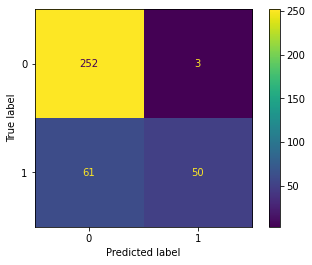

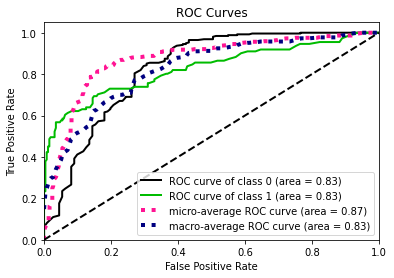


..........Tweets of anticipation Emotion..........
Random Forest Test Accuracy: 0.7349726775956285
Accuracy score: 0.7349726775956285
F1-score: 0.7191008568919272
Precision-score: 0.7566437007874016
Recall-score: 0.7196912707248819
ROC-AUC-score: 0.8435892035025426
[[178  21]
 [ 76  91]]


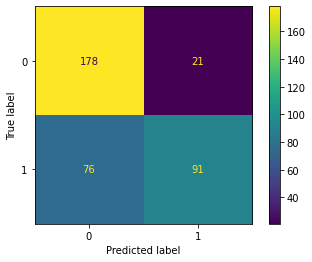

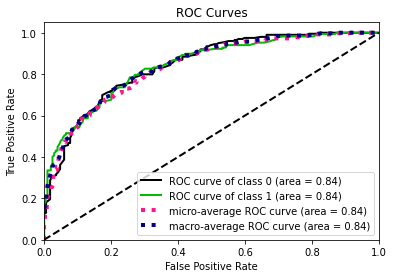


..........Tweets of disgust Emotion..........
Random Forest Test Accuracy: 0.8688524590163934
Accuracy score: 0.8688524590163934
F1-score: 0.754142409314823
Precision-score: 0.927710843373494
Recall-score: 0.7073170731707317
ROC-AUC-score: 0.8723591549295774
[[284   0]
 [ 48  34]]


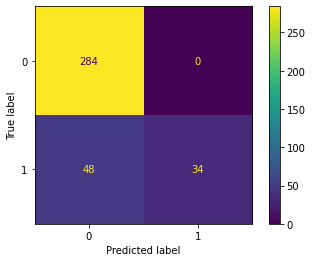

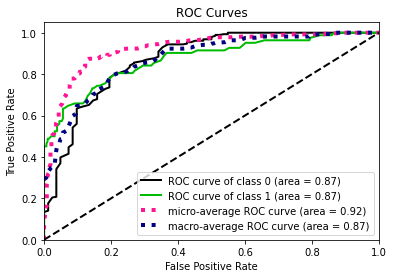


..........Tweets of fear Emotion..........
Random Forest Test Accuracy: 0.7950819672131147
Accuracy score: 0.7950819672131147
F1-score: 0.726775956284153
Precision-score: 0.7465218138096874
Recall-score: 0.7144965439940221
ROC-AUC-score: 0.8111899869232206
[[ 54  47]
 [ 28 237]]


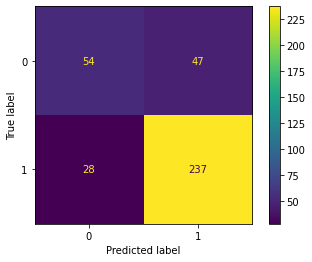

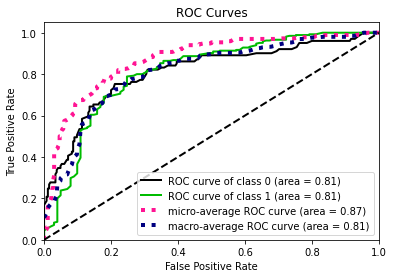


..........Tweets of joy Emotion..........
Random Forest Test Accuracy: 0.6830601092896175
Accuracy score: 0.6830601092896175
F1-score: 0.6616836132980588
Precision-score: 0.6930752840909091
Recall-score: 0.6641209852692587
ROC-AUC-score: 0.7557051436851001
[[171  31]
 [ 85  79]]


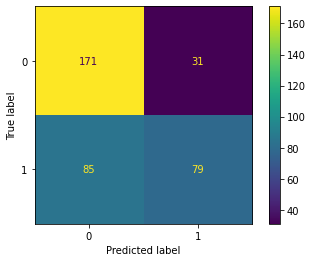

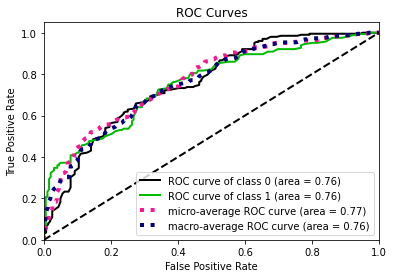


..........Tweets of sadness Emotion..........
Random Forest Test Accuracy: 0.8497267759562842
Accuracy score: 0.8497267759562842
F1-score: 0.8077639306689586
Precision-score: 0.8671207264957266
Recall-score: 0.7830810421171868
ROC-AUC-score: 0.8679675968832595
[[241   8]
 [ 47  70]]


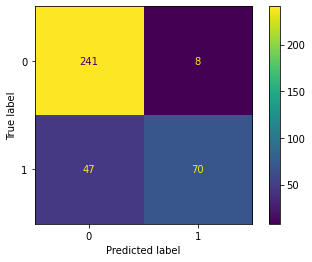

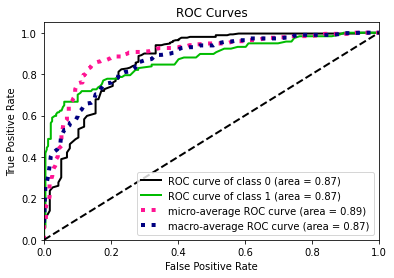


..........Tweets of surprise Emotion..........
Random Forest Test Accuracy: 0.8387978142076503
Accuracy score: 0.8387978142076503
F1-score: 0.7711409040326427
Precision-score: 0.8762315270935961
Recall-score: 0.7399243208510335
ROC-AUC-score: 0.8591546781851284
[[253   4]
 [ 55  54]]


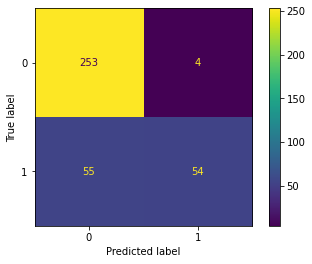

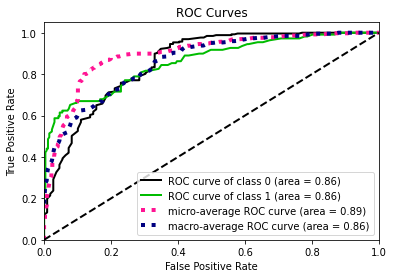


..........Tweets of trust Emotion..........
Random Forest Test Accuracy: 0.6939890710382514
Accuracy score: 0.6939890710382514
F1-score: 0.6916318117533777
Precision-score: 0.7019763090341138
Recall-score: 0.6950276243093922
ROC-AUC-score: 0.7690757055397941
[[143  38]
 [ 74 111]]


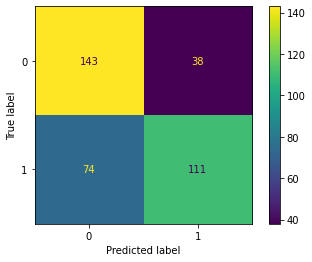

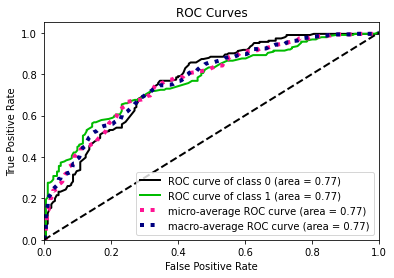

Execution time: 0:00:18.576228


In [47]:
#@title Save Best Model (Emotion - TFIDF - Unigram - RF)
emotion_pipeline_rf = Pipeline([('cv', TfidfVectorizer(ngram_range=(1,1))),
                                ('smote', SMOTE(random_state=42)),
                                ('rf_model', RandomForestClassifier(n_estimators=200))])

#List of Pipelines
pipelines = [emotion_pipeline_rf]

#Dictionary of Pipelines
pipe_dict = {0: 'Random Forest'}

class_names = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

start = datetime.now()

#Fit the Pipelines
for i, pipe in enumerate(pipelines):
  print("\n========== {} ==========".format(pipe_dict[i]))
  for emotion in class_names:
    print('\n..........Tweets of {} Emotion..........'.format(emotion))
    pipe.fit(X_emotion_train, train[emotion])

    emotion_y_predict_test = pipe.predict(X_emotion_test)
    emotion_y_predict_proba = pipe.predict_proba(X_emotion_test)
    print("{} Test Accuracy: {}".format(pipe_dict[i],pipe.score(X_emotion_test,test[emotion])))
    print('Accuracy score:',accuracy_score(test[emotion], emotion_y_predict_test))
    print('F1-score:',f1_score(test[emotion], emotion_y_predict_test, average='macro'))
    print('Precision-score:',precision_score(test[emotion], emotion_y_predict_test, average='macro'))
    print('Recall-score:',recall_score(test[emotion], emotion_y_predict_test, average='macro'))
    print('ROC-AUC-score:',roc_auc_score(test[emotion], emotion_y_predict_proba[:, 1], average='macro', multi_class='ovo'))
    print(confusion_matrix(test[emotion], emotion_y_predict_test)) 
    
    (ConfusionMatrixDisplay((metrics.confusion_matrix(test[emotion], emotion_y_predict_test)))).plot()
    skplt.metrics.plot_roc(test[emotion], emotion_y_predict_proba)
    plt.show()
    
stop = datetime.now()
execution_time = stop-start
print("Execution time:", execution_time)

model_file = open("english_emotion_rf.pkl","wb")
joblib.dump(emotion_pipeline_rf,model_file)
model_file.close()

___

# Simple Prediction

In [48]:
!pip install neattext
from neattext.functions import clean_text
sample_text = "Keep doing welfare activities, team @Thalafansml Thank u for your engagement on #malaysiaflood 👏"
sample_text = clean_text(sample_text)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 KB 5.5 MB/s eta 0:00:00


In [49]:
pipe = joblib.load("english_flood_related_mnb.pkl","r")

pipe.predict([sample_text])

array([1])

In [50]:
flood_pipeline_mnb.predict_proba([sample_text])

array([[0.00785709, 0.99214291]])

In [51]:
flood_pipeline_mnb.classes_

array([0, 1])

In [52]:
sentiment_pipeline_svm.predict([sample_text])

array(['neutral'], dtype=object)

In [53]:
sentiment_pipeline_svm.predict_proba([sample_text])

array([[0.39903928, 0.43061411, 0.17034661]])

In [54]:
english_emotions = pd.DataFrame(columns=['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust'])
english_emotions

Empty DataFrame
Columns: [anger, anticipation, disgust, fear, joy, sadness, surprise, trust]
Index: []

In [55]:
emotion_pipeline_rf = Pipeline([('cv', TfidfVectorizer(ngram_range=(1,1))),
                                ('smote', SMOTE(random_state=42)),
                                ('rf_model', RandomForestClassifier())])

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

for label in emotion:
  print('\n..........Processing Tweets of {} Emotion..........'.format(label))
  emotion_pipeline_rf.fit(X_emotion_train, train[label])

  y_pred_X = emotion_pipeline_rf.predict(X_emotion_test)
  print('Accuracy score:',accuracy_score(test[label], y_pred_X))

  test_y_prob = emotion_pipeline_rf.predict_proba(X_emotion_test)[:,1]
  english_emotions[label] = test_y_prob


..........Processing Tweets of anger Emotion..........
Accuracy score: 0.8169398907103825

..........Processing Tweets of anticipation Emotion..........
Accuracy score: 0.7431693989071039

..........Processing Tweets of disgust Emotion..........
Accuracy score: 0.8688524590163934

..........Processing Tweets of fear Emotion..........
Accuracy score: 0.7978142076502732

..........Processing Tweets of joy Emotion..........
Accuracy score: 0.7103825136612022

..........Processing Tweets of sadness Emotion..........
Accuracy score: 0.8387978142076503

..........Processing Tweets of surprise Emotion..........
Accuracy score: 0.8415300546448088

..........Processing Tweets of trust Emotion..........
Accuracy score: 0.6912568306010929


In [56]:
english_emotions

anger  anticipation  disgust   fear   joy  sadness  surprise  trust
0     0.38          0.22     0.15  0.650  0.45     0.34      0.10   0.18
1     0.20          0.50     0.03  0.520  0.39     0.16      0.15   0.67
2     0.60          0.30     0.27  0.200  0.41     0.36      0.18   0.40
3     0.65          0.26     0.16  0.260  0.32     0.82      0.14   0.41
4     0.30          0.63     0.38  0.570  0.90     0.27      0.81   0.87
..     ...           ...      ...    ...   ...      ...       ...    ...
361   0.03          0.12     0.00  0.640  0.16     0.05      0.12   0.16
362   0.06          0.08     0.08  0.490  0.26     0.21      0.05   0.47
363   0.12          0.46     0.15  0.310  0.21     0.39      0.30   0.18
364   0.32          0.02     0.33  0.715  0.20     0.26      0.06   0.48
365   0.17          0.57     0.20  0.890  0.63     0.30      0.25   0.83

[366 rows x 8 columns]

In [57]:
model_file = open("english_emotion_rf.pkl","wb")
joblib.dump(emotion_pipeline_rf,model_file)
model_file.close()

In [59]:
sample_text = "Keep doing welfare activities, team @Thalafansml Thank u for your engagement on #malaysiaflood 👏"
sample_text = clean_text(sample_text)

'welfare activities, team @thalafansml thank u engagement #malaysiaflood '

In [60]:
pipe = joblib.load(open("english_emotion_rf.pkl","rb"))

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']
results = pd.DataFrame(columns=['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust'])

# sample = pd.DataFrame(columns=['text'])
# sample['text'] = [sample_text]

# sample

text
0  welfare activities, team @thalafansml thank u ...

In [61]:
for label in emotion:
  pipe.fit(X_emotion_train, train[label])

  test_y_prob = pipe.predict_proba([sample_text])[:,1]
  results[label] = test_y_prob

results

anger  anticipation  disgust  fear  joy  sadness  surprise  trust
0   0.07          0.18      0.0  0.73  0.1     0.11      0.15   0.84